In [ ]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install py7zr

# Import the necessary module
from py7zr import SevenZipFile

# Specify the path to your 7z file
zip_file_path = '/content/gdrive/MyDrive/all.7z'

# Specify the destination directory for extracting the contents
extracted_path = '/content/gdrive/MyDrive/all_videos/'

# Create the SevenZipFile object
with SevenZipFile(zip_file_path, mode='r') as z:
    # Extract all contents to the specified directory
    z.extractall(path=extracted_path)

In [ ]:
!pip install rarfile
import rarfile
import os

# Specify the path to your RAR file
rar_file_path = "/content/gdrive/MyDrive/all_part1.rar"

# Specify the directory to extract the contents
extract_to_directory = "/content/gdrive/MyDrive/all_part2"

# Create the output directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the RAR file
with rarfile.RarFile(rar_file_path, 'r') as rar:
    rar.extractall(extract_to_directory)

# List the extracted files
extracted_files = os.listdir(extract_to_directory)
print("Extracted files:", extracted_files)


Extracted files: ['all']


In [ ]:
#just for testing
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d vishnutheepb/msrvtt
!unzip msrvtt.zip

In [ ]:
!pwd

/content


In [ ]:
#need to rerun these everytime we re-assigned to a GPU on google colab
!pip install git+https://github.com/microsoft/azfuse.git
!pip install av
!pip install unrar
!pip install boto3

In [ ]:
###just for testing###

import shutil

source_path = '/content/gdrive/MyDrive/all_videos/all/'
destination_path = '/content/gdrive/MyDrive/testVD/'

all_files = os.listdir(source_path)

selected_files = [file for file in all_files]

# Limit the selection to the first 200 files
selected_files = selected_files[:200]

# Copy selected files to the destination directory
for file in selected_files:
    source_file_path = os.path.join(source_path, file)
    destination_file_path = os.path.join(destination_path, file)

    try:
        shutil.copy(source_file_path, destination_file_path)
        print(f"Copied: {file}")
    except Exception as e:
        print(f"Error copying {file}: {e}")


#count total num of training videos
directory_path = '/content/gdrive/MyDrive/testVD'
video_file_extension = '.mp4'
video_files = [file for file in os.listdir(directory_path) if file.endswith(video_file_extension)]
num_videos = len(video_files)

In [ ]:
!cd /content/gdrive/MyDrive/
!ls
#!unrar x generativeimage2text.rar
!unrar x all_part1.rar

gdrive	generativeimage2text  generativeimage2text.rar	sample_data

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open all_part1.rar
No such file or directory
No files to extract


In [ ]:
!unrar x generativeimage2text.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from generativeimage2text.rar

Creating    generativeimage2text                                      OK
Extracting  generativeimage2text/train.py                                  2%  OK 
Creating    generativeimage2text/__pycache__                          OK
Extracting  generativeimage2text/__pycache__/common.cpython-310.pyc        7%  OK 
Extracting  generativeimage2text/__pycache__/process_image.cpython-310.pyc       8%  OK 
Extracting  generativeimage2text/__pycache__/inference.cpython-310.pyc      12%  OK 
Extracting  generativeimage2text/__pycache__/__init__.cpython-310.pyc      12%  OK 
Extracting  generativeimage2text/__pycache__/model.cpython-310.pyc        14%  OK 
Extracting  generativeimage2text/__pycache__/torch_common.cpython-310.pyc      16%  OK 
Extracting  generativeimage2text/__pycache__/tsv_io.cpython-310.pyc       

In [ ]:
import av
import numpy as np
import os
import random
from tqdm import tqdm
from PIL import Image
from huggingface_hub import hf_hub_download
from transformers import AutoProcessor, AutoModelForCausalLM
import torch

import pickle
from math import floor
from transformers import GitForCausalLM, GitConfig, BertTokenizer


from generativeimage2text.torch_common import torch_load, load_state_dict
from generativeimage2text.model import get_git_model
from generativeimage2text.tsv_io import TSVFile, tsv_writer, tsv_reader
from generativeimage2text.inference import get_image_transform

#count total num of training videos
#directory_path = '/content/gdrive/MyDrive/testVD'
directory_path = '/content/gdrive/MyDrive/all_part2/all'
video_file_extension = '.mp4'
video_files = [file for file in os.listdir(directory_path) if file.endswith(video_file_extension)]
num_videos = len(video_files)
print(num_videos)
print(video_files)

5000
['video6449.mp4', 'video5385.mp4', 'video5521.mp4', 'video8789.mp4', 'video9328.mp4', 'video9861.mp4', 'video5629.mp4', 'video7557.mp4', 'video9250.mp4', 'video8106.mp4', 'video6912.mp4', 'video5005.mp4', 'video5779.mp4', 'video5509.mp4', 'video7141.mp4', 'video8203.mp4', 'video7040.mp4', 'video8707.mp4', 'video8691.mp4', 'video5131.mp4', 'video5092.mp4', 'video8109.mp4', 'video5924.mp4', 'video6931.mp4', 'video6840.mp4', 'video8839.mp4', 'video5699.mp4', 'video6647.mp4', 'video7894.mp4', 'video8423.mp4', 'video7574.mp4', 'video6964.mp4', 'video7811.mp4', 'video7437.mp4', 'video9153.mp4', 'video8818.mp4', 'video6011.mp4', 'video9460.mp4', 'video8860.mp4', 'video7354.mp4', 'video5735.mp4', 'video9279.mp4', 'video5351.mp4', 'video6143.mp4', 'video7338.mp4', 'video9684.mp4', 'video5320.mp4', 'video9277.mp4', 'video5874.mp4', 'video5354.mp4', 'video5325.mp4', 'video6696.mp4', 'video8721.mp4', 'video7146.mp4', 'video9761.mp4', 'video8237.mp4', 'video5761.mp4', 'video6075.mp4', 'video78

In [ ]:
!pip install google-cloud-storage


In [ ]:
#deleting old video feature batch
vd_f_b = '/content/gdrive/MyDrive/video_feature_batch'
files = os.listdir(vd_f_b)
for file in files:
    file_path = os.path.join(vd_f_b, file)
    try:
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")

Deleted: /content/gdrive/MyDrive/video_feature_batch/video_feature_batch_0.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_name_batch_0.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_feature_batch_1.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_name_batch_1.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_feature_batch_2.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_name_batch_2.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_feature_batch_3.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_name_batch_3.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_feature_batch_4.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_name_batch_4.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_feature_batch_5.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_name_batch_5.pkl
Deleted: /content/gdrive/MyDrive/video_feature_batch/video_feature_bat

In [ ]:
param = {"num_image_with_embedding":15}
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# image_tsv = TSVFile(image_tsv)
transforms = get_image_transform(param)

model = get_git_model(tokenizer, param)

#pretrained = f'model/GIT_BASE_MSRVTT.pt'
pretrained = f'/content/gdrive/MyDrive/model.pt'

checkpoint = torch_load(pretrained)['model']
load_state_dict(model, checkpoint)
model.cuda()
#model.cpu()
model.eval()
# model.config.num_image_with_embedding = 20


num_frames = model.num_image_with_embedding

# set seed for reproducability
np.random.seed(45)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def read_video_pyav(container, indices):
    '''
    Decode the video with PyAV decoder.
    Args:
        container (`av.container.input.InputContainer`): PyAV container.
        indices (`List[int]`): List of frame indices to decode.
    Returns:
        result (np.ndarray): np array of decoded frames of shape (num_frames, height, width, 3).
    '''
    frames = []
    container.seek(0)
    start_index = indices[0]
    end_index = indices[-1]
    for i, frame in enumerate(container.decode(video=0)):
        # transfer to PIL image
        frame = frame.to_image()
        if i > end_index:
            break
        if i >= start_index and i in indices:
            frames.append(frame)
    frames = [transforms(i) for i in frames]
    # return np.stack([x.to_ndarray(format="rgb24") for x in frames])
    return frames
def sample_frame_indices(clip_len, frame_sample_rate, seg_len):
    '''
    Sample a given number of frame indices from the video.
    Args:
        clip_len (`int`): Total number of frames to sample.
        frame_sample_rate (`int`): Sample every n-th frame.
        seg_len (`int`): Maximum allowed index of sample's last frame.
    Returns:
        indices (`List[int]`): List of sampled frame indices
    '''
    converted_len = int(clip_len * frame_sample_rate)
    end_idx = np.random.randint(converted_len, seg_len)
    start_idx = end_idx - converted_len
    indices = np.linspace(start_idx, end_idx, num=clip_len)
    indices = np.clip(indices, start_idx, end_idx - 1).astype(np.int64)
    return indices


# load video
#file_path="../../../USC/CSCI567/project/datasets/MSRVTT/videos/all/"
file_path = "/content/gdrive/MyDrive/all_part2/all"
max_text_len = 50
prefix_encoding = tokenizer("",
                            padding='do_not_pad',
                            truncation=True,
                            add_special_tokens=False,
                            max_length=max_text_len)
payload = prefix_encoding['input_ids']
if len(payload) > max_text_len - 2:
    payload = payload[-(max_text_len - 2):]
input_ids = [tokenizer.cls_token_id] + payload

batch_size=10
pca_video_size=100
#batch_size=20
#pca_video_size=500

video_feature_batch = torch.zeros((pca_video_size, 197*param['num_image_with_embedding'], 768)).cuda()
#video_feature_batch = torch.zeros((pca_video_size, 197*param['num_image_with_embedding'], 768))
batch_count = 0
#cur_idx = 0
frames_batch_list = []
for i in range(param['num_image_with_embedding']):
    frames_batch_list.append(torch.empty((batch_size, 3, 224, 224)).cuda())
    #frames_batch_list.append(torch.empty((batch_size, 3, 224, 224)))

filename_list=os.listdir(file_path)
#random.shuffle(filename_list)
video_name_list=[]
cur_idx = 0
print(filename_list[cur_idx])

#save_path = "/../mnt/e/datasets/MSRVTT/video_feature_batch"
save_path = "/content/gdrive/MyDrive/video_feature_batch"
cur_idx = 0
for cur_idx in range(int(num_videos/pca_video_size)):
    filename_list_100 = filename_list[cur_idx*pca_video_size:cur_idx*pca_video_size+pca_video_size]
    vid_batch_idx = 0
    batch_count = 0
    for filename in tqdm(filename_list_100):
        if vid_batch_idx>=pca_video_size:
            break
        video_path = os.path.join(file_path, filename)
        if not os.path.isfile(video_path) or not filename.endswith(('.mp4', '.avi', '.mkv')):
            continue
        if batch_count<batch_size:
            video_path = os.path.join(file_path, filename)
            container = av.open(video_path)
            # print(container.name)
            # sample frames
            if num_frames*4>=container.streams.video[0].frames:
                print('num-frame: ', container.streams.video[0].frames)
                video_feature_batch[vid_batch_idx-batch_size+1:vid_batch_idx+1,:,:] = torch.zeros((batch_size, 197*param['num_image_with_embedding'], 768)).cuda()
                #video_feature_batch[vid_batch_idx-batch_size+1:vid_batch_idx+1,:,:] = torch.zeros((batch_size, 197*param['num_image_with_embedding'], 768))
                continue
            video_name_list.append(filename)

            indices = sample_frame_indices(
                clip_len=num_frames, frame_sample_rate=4, seg_len=container.streams.video[0].frames
            )

            frames = read_video_pyav(container, indices)
            frames = [i.unsqueeze(0).cuda() for i in frames]
            #frames = [i.unsqueeze(0) for i in frames]
            for i in range(param['num_image_with_embedding']):
                frames_batch_list[i][batch_count, :, :, :] = frames[i]
            container.close()

            if batch_count==batch_size-1:
                #print('bc:',batch_count, vid_batch_idx, cur_idx)
                with torch.no_grad():
                    features_batch = model.get_image_feature({
                        'image': frames_batch_list,
                        'prefix': torch.tensor(input_ids).unsqueeze(0).cuda(),
                        #'prefix': torch.tensor(input_ids).unsqueeze(0),
                    })
                #print(features_batch.shape)
                #print(cur_idx)
                video_feature_batch[vid_batch_idx-batch_size+1:vid_batch_idx+1,:,:] = features_batch
                #print(features_batch[-1,0,0:10])
                #print(video_feature_batch[cur_idx,0,0:10])
                batch_count=-1

        batch_count+=1
        vid_batch_idx+=1

    #print("haha")
    with open(f"{save_path}/video_feature_batch_{cur_idx}.pkl", "wb") as f:
    #with open(f"/home/williamk/GIT/dataset/MSRVTT/data/MSRVTT/videos/video_feature_batch_{pca_video_size}.pkl", "wb") as f:
        #print('video_feature_batch_{pca_video_size}.pkl')
        pickle.dump(video_feature_batch.to("cpu"), f)
    with open(f"{save_path}/video_name_batch_{cur_idx}.pkl", "wb") as f:
        pickle.dump(filename_list_100, f)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|███████████████████████| 350837078/350837078 [00:04<00:00, 70591997.20it/s]


video6449.mp4


 53%|█████▎    | 53/100 [00:40<00:27,  1.69it/s]

num-frame:  60


100%|██████████| 100/100 [01:12<00:00,  1.39it/s]


In [ ]:
print(cur_idx)

49


# **PCA**

In [ ]:
video_name_list=[]
for i in range(0, 49):  # Assuming your files are named from 1.pkl to 50.pkl
    pickle_file_path = f"/content/gdrive/MyDrive/video_feature_batch/video_name_batch_{i}.pkl"

    # Open the pickle file for reading
    with open(pickle_file_path, 'rb') as pickle_file:
        # Load the list of strings from the pickle file
        strings_from_file = pickle.load(pickle_file)

        # Append the strings to the overall list
        video_name_list.append(strings_from_file)

# Print or use the combined list of strings
print(video_name_list)

In [ ]:
##just for testing or incase GPU disconnected
cur_idx = 49
print(cur_idx)
save_path = "/content/gdrive/MyDrive/video_feature_batch"
pca_video_size = 100
file_path = "/content/gdrive/MyDrive/all_part2/all"
filename_list=os.listdir(file_path)
num_videos = 5000
video_name_list=[]
for i in range(num_videos):
  video_name_list.append(filename_list[i])

49


In [ ]:
print(len(video_name_list))
print(video_name_list)

5000
['video6449.mp4', 'video5385.mp4', 'video5521.mp4', 'video8789.mp4', 'video9328.mp4', 'video9861.mp4', 'video5629.mp4', 'video7557.mp4', 'video9250.mp4', 'video8106.mp4', 'video6912.mp4', 'video5005.mp4', 'video5779.mp4', 'video5509.mp4', 'video7141.mp4', 'video8203.mp4', 'video7040.mp4', 'video8707.mp4', 'video8691.mp4', 'video5131.mp4', 'video5092.mp4', 'video8109.mp4', 'video5924.mp4', 'video6931.mp4', 'video6840.mp4', 'video8839.mp4', 'video5699.mp4', 'video6647.mp4', 'video7894.mp4', 'video8423.mp4', 'video7574.mp4', 'video6964.mp4', 'video7811.mp4', 'video7437.mp4', 'video9153.mp4', 'video8818.mp4', 'video6011.mp4', 'video9460.mp4', 'video8860.mp4', 'video7354.mp4', 'video5735.mp4', 'video9279.mp4', 'video5351.mp4', 'video6143.mp4', 'video7338.mp4', 'video9684.mp4', 'video5320.mp4', 'video9277.mp4', 'video5874.mp4', 'video5354.mp4', 'video5325.mp4', 'video6696.mp4', 'video8721.mp4', 'video7146.mp4', 'video9761.mp4', 'video8237.mp4', 'video5761.mp4', 'video6075.mp4', 'video78

In [ ]:
#numpy_arrays = []
#for pc in pca_df.iloc:
    #print(pc.values)
#    numpy_arrays.append([series for series in pc])
#    print('pcs: ',pc)
#numpy_arrays = np.array(numpy_arrays)
#print(numpy_arrays)

idx:  0
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_0.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:19<00:00, 7888.68it/s] 


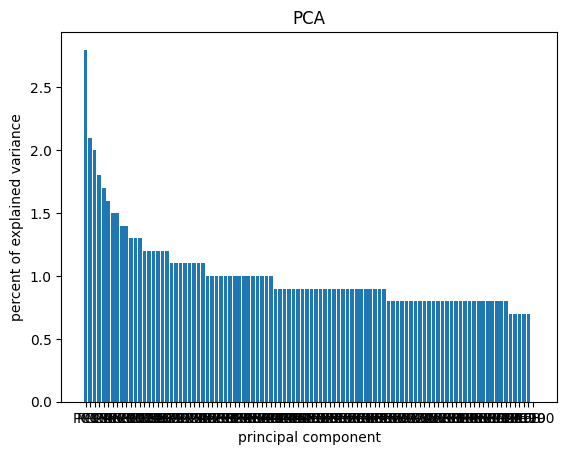

tensor([[-2.0231e+02, -2.0916e+02, -8.4033e+01,  ...,  2.9733e+01,
         -3.4031e+01, -3.2157e-12],
        [ 6.4014e+00,  5.7809e+02,  3.4916e+02,  ...,  8.5386e+01,
         -6.7814e+01,  2.8142e-13],
        [ 7.4095e+01,  4.4930e+01, -2.8304e+02,  ...,  1.0941e+02,
          2.1882e+01,  1.8919e-12],
        ...,
        [-1.5595e+02,  5.9932e+01, -3.4179e+02,  ..., -1.6975e+02,
         -1.4649e+01, -6.1903e-13],
        [ 2.0199e+01,  2.4406e+02, -4.3646e+01,  ...,  1.2437e+02,
         -2.1863e+01, -2.0763e-11],
        [-1.7106e+02,  2.0255e+02,  6.3751e+01,  ..., -4.5440e+01,
          2.0772e+01, -2.2717e-11]], dtype=torch.float64)
[3 1 2 3 0 3 3 0 0 0 0 3 3 3 2 2 0 2 0 3 3 2 3 2 0 1 3 2 3 0 2 0 0 1 2 0 3
 2 2 0 3 3 3 3 2 0 0 3 3 2 2 0 3 2 3 0 2 0 0 3 3 2 3 0 3 2 2 2 0 2 3 2 2 2
 2 3 0 0 2 0 3 2 0 2 2 2 2 0 1 3 3 3 3 0 3 1 3 3 0 0]
vdcldiclen: 4
idx:  1
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_1.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:21<00:00, 7022.86it/s]


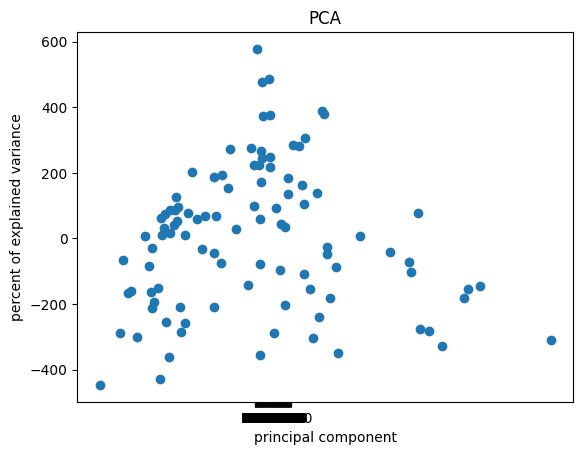

tensor([[-1.9622e+02, -2.9563e+01,  6.3839e+01,  ...,  7.0003e+00,
         -1.7025e+00,  1.5997e-01],
        [ 2.2571e+02,  9.0763e+01, -2.1270e+01,  ..., -4.9517e+00,
          1.3166e+01, -1.0598e+00],
        [-2.1494e+02, -8.7246e+01,  2.5819e+01,  ...,  7.0854e+00,
         -1.5378e+01,  7.6080e-01],
        ...,
        [ 1.9696e+01,  1.2384e+02,  5.0459e+01,  ..., -2.6425e+00,
          1.3380e+01, -2.8431e-01],
        [ 1.6145e+02, -7.1458e+00, -2.7264e+02,  ..., -9.8137e+00,
          7.7469e+00,  1.5625e+00],
        [-2.2976e+02, -1.9257e+02,  1.0744e+02,  ...,  1.5854e+01,
         -5.4455e+00,  1.0914e+00]], dtype=torch.float64)
[3 1 3 3 0 0 0 1 3 2 2 3 1 0 1 2 2 2 3 0 2 0 3 0 2 2 1 2 3 3 3 2 3 0 1 0 3
 3 3 3 3 2 3 2 1 3 2 3 0 2 1 0 1 2 1 3 0 3 2 3 2 3 3 0 1 1 0 2 2 0 0 0 0 3
 0 0 0 1 1 1 3 3 0 3 2 1 2 2 2 0 2 1 2 3 1 2 0 2 1 3]
vdcldiclen: 4
idx:  2
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_2.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:14<00:00, 10760.14it/s]


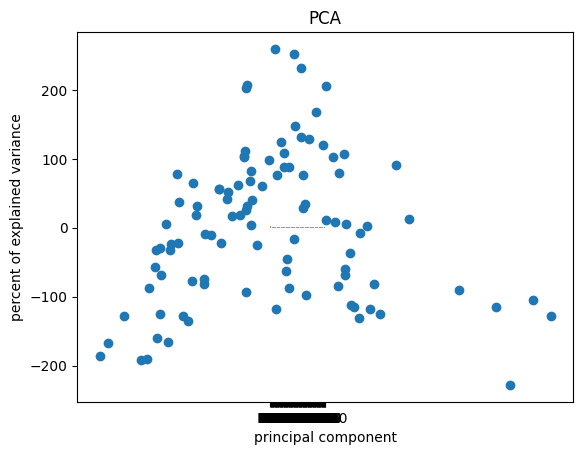

tensor([[-1.4370e+02, -1.7057e+02, -8.9626e+01,  ...,  3.5216e+01,
          6.0969e+00,  2.3546e-01],
        [-1.5965e+02,  4.1690e+00, -1.8067e+02,  ...,  1.8114e+00,
         -4.2951e+00,  1.1193e+00],
        [-1.4184e+02, -2.6267e+01, -1.7914e+02,  ..., -8.7876e+00,
          6.9022e+00,  1.1795e+00],
        ...,
        [ 2.8721e+01,  2.5823e+02,  1.3332e+02,  ..., -6.3755e+00,
          3.5651e+00,  1.4789e+00],
        [-2.2384e+02, -1.1147e+02, -8.7671e+01,  ...,  1.6601e+01,
         -7.4802e-01, -6.8614e-01],
        [-1.9210e+02, -4.1305e+01, -8.2754e+01,  ...,  8.5108e+00,
         -8.5590e+00,  8.4423e-01]], dtype=torch.float64)
[0 0 0 0 2 1 2 2 0 1 0 3 0 2 0 1 3 3 0 2 2 2 3 0 2 0 0 2 3 2 0 2 2 3 2 2 2
 3 2 3 2 2 0 2 0 0 3 1 3 3 1 0 2 0 3 2 2 1 1 0 2 1 3 0 0 0 3 2 0 1 3 2 2 3
 2 1 1 1 2 0 0 0 0 0 0 2 0 3 3 2 0 0 0 3 0 2 2 1 0 0]
vdcldiclen: 4
idx:  3
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_3.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:21<00:00, 7131.86it/s]


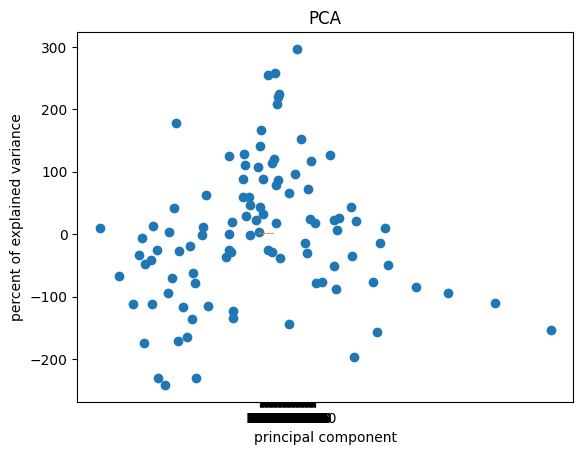

tensor([[ 4.7347e+01, -1.6052e+02,  2.8730e+01,  ..., -1.0798e+01,
         -7.6697e+00, -7.3554e-01],
        [ 1.3399e+02,  2.4814e+02,  2.3620e+02,  ..., -3.3688e+00,
         -3.6929e+00,  5.4855e-01],
        [-1.3287e+01,  7.6783e+01,  9.4260e+01,  ..., -7.0081e+00,
         -1.1071e+01,  5.6199e-01],
        ...,
        [-2.4050e+01, -1.2360e+02, -3.6043e+01,  ..., -2.7932e+01,
          3.2127e+00, -1.6813e-01],
        [-2.0931e+02, -7.5891e+01,  5.0394e+01,  ...,  2.7926e+00,
         -2.1498e+01,  7.1621e-01],
        [ 6.7600e+01,  1.9696e+02,  1.6528e+02,  ...,  7.4939e+00,
         -2.5384e+01, -4.8233e-01]], dtype=torch.float64)
[3 1 1 1 2 3 1 1 3 1 1 3 1 2 3 1 1 1 3 1 1 1 2 3 1 1 1 2 3 1 3 1 1 1 1 1 3
 3 3 2 1 1 2 1 2 2 3 2 2 3 3 0 1 2 3 3 2 3 3 3 3 1 3 2 3 2 2 3 1 3 3 3 3 2
 1 0 2 1 3 1 1 1 2 1 1 1 0 1 2 1 1 3 2 1 3 0 1 3 3 1]
vdcldiclen: 4
idx:  4
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_4.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9884.36it/s] 


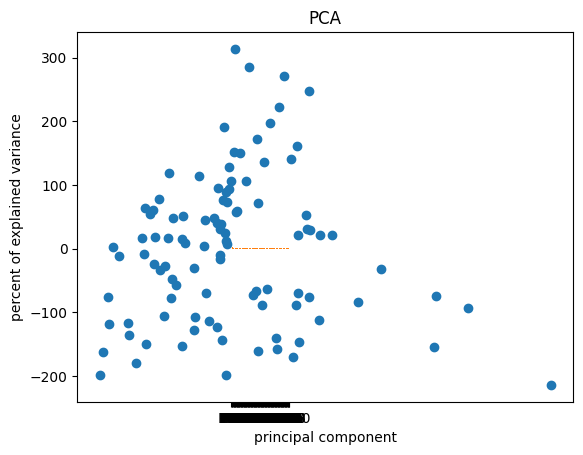

tensor([[-5.6901e+01,  8.4310e+01, -8.3404e+01,  ..., -1.1226e+01,
          1.5579e+01, -4.2461e-01],
        [ 5.0147e+02, -1.7600e+02, -2.6676e+01,  ...,  4.9529e+00,
          3.8362e+01, -5.4236e-01],
        [-1.2890e+02, -1.9980e+02,  1.5242e+02,  ..., -7.4907e+00,
          1.4490e+00,  1.0159e+00],
        ...,
        [-9.1332e+01, -8.2006e+01, -6.9194e+01,  ...,  2.1422e+00,
         -3.7112e+00,  5.8204e-01],
        [ 7.8833e+01, -2.4064e+01, -3.1076e+01,  ...,  3.9542e+00,
          1.2009e+01,  1.2651e+00],
        [-1.3419e+02, -2.1889e+01, -2.4295e+01,  ...,  1.2492e+01,
         -1.2105e+01,  8.0253e-01]], dtype=torch.float64)
[0 2 1 2 3 3 1 0 0 0 3 0 2 3 0 0 3 1 3 2 0 2 0 3 1 3 3 0 1 1 3 1 3 1 0 1 0
 0 3 0 2 3 3 3 1 3 3 0 3 0 1 0 0 3 1 0 0 1 3 1 0 3 1 3 0 1 3 3 3 1 1 3 0 3
 3 0 3 0 3 1 3 3 0 3 3 3 0 3 3 1 0 1 1 0 0 3 0 0 1 0]
vdcldiclen: 4
idx:  5
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_5.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9062.92it/s] 


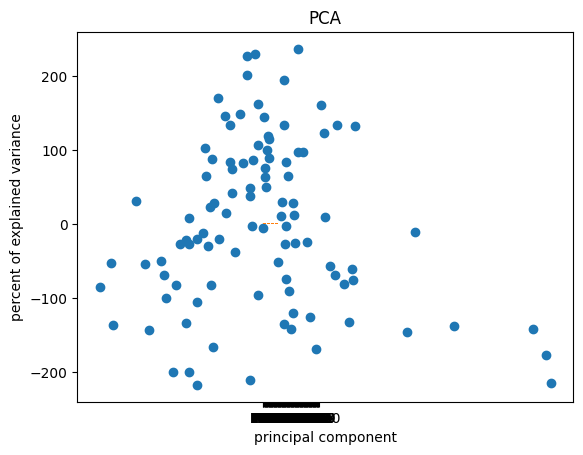

tensor([[-3.5411e+01,  9.3744e+00,  2.6100e+01,  ..., -1.3889e+01,
         -1.8869e+01, -4.9060e-01],
        [ 2.5095e+02, -1.4238e+02,  1.3444e+02,  ...,  2.5381e+01,
          4.5503e+00,  3.3189e-01],
        [-1.4534e+02,  7.2345e+01, -5.2385e+01,  ...,  2.7121e+01,
         -6.8980e+00,  7.7763e-02],
        ...,
        [-1.1803e+02,  5.6900e+01,  2.6710e+01,  ...,  2.6706e+00,
          1.8357e+01, -3.0869e-01],
        [ 3.5195e+01,  5.6943e+01, -1.2842e+01,  ...,  2.2520e+01,
          4.9800e+00, -1.1687e+00],
        [ 2.9808e+02, -2.2222e+02,  3.8678e+02,  ...,  3.7787e+01,
         -1.2112e+01,  3.4356e-01]], dtype=torch.float64)
[2 3 2 2 2 2 3 2 2 2 1 2 2 2 0 3 3 2 1 0 0 3 3 1 2 2 2 2 2 3 1 2 1 1 3 2 1
 2 0 1 2 3 1 1 2 2 2 1 2 2 2 0 1 2 0 2 3 2 1 0 3 1 3 1 2 1 2 2 0 1 2 1 2 0
 2 2 2 3 2 3 0 2 0 1 3 0 3 3 2 2 1 2 2 2 1 1 1 2 2 3]
vdcldiclen: 4
idx:  6
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_6.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:22<00:00, 6785.90it/s]


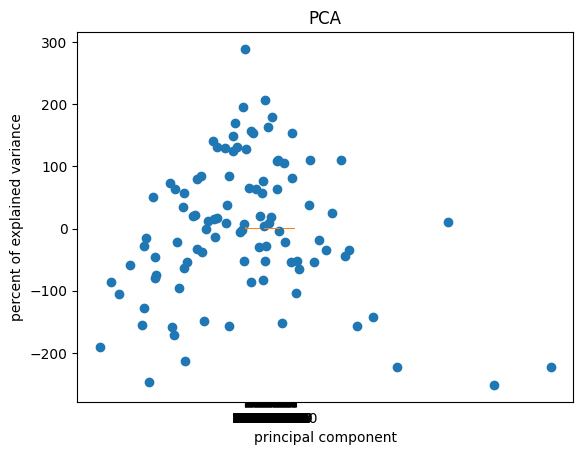

tensor([[-1.3523e+02, -8.8582e+01, -1.1080e+02,  ...,  4.9045e+01,
         -2.9128e+00,  1.7071e+00],
        [ 1.5330e+02,  1.5217e+02, -5.2292e+00,  ..., -1.6499e+01,
         -2.5841e+01,  9.4689e-01],
        [-1.4090e+02, -1.2309e+02,  5.3197e+01,  ...,  2.7505e+00,
         -2.8330e+00,  9.5125e-01],
        ...,
        [-2.2817e+02, -7.5020e+01,  4.7139e+01,  ...,  1.1414e+01,
         -1.3408e+01,  2.2731e-01],
        [-1.2551e+02,  8.1582e+01,  2.9246e+01,  ...,  1.5567e+00,
         -1.8425e+01,  1.2380e+00],
        [-1.5752e+01, -5.3154e+00, -7.0027e+01,  ..., -1.0001e+01,
          1.8979e+01,  3.5275e-01]], dtype=torch.float64)
[2 1 3 1 3 3 3 3 0 3 3 1 3 3 3 1 3 2 1 3 0 3 1 1 1 1 3 3 3 2 3 3 3 1 3 3 3
 3 3 0 1 3 1 3 3 3 3 3 1 3 3 0 1 1 3 2 3 3 1 3 0 1 1 1 1 1 1 3 1 1 1 3 3 3
 1 3 3 1 1 3 3 3 2 3 2 1 3 2 2 1 1 3 3 3 3 3 3 3 3 3]
vdcldiclen: 4
idx:  7
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_7.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9588.21it/s]


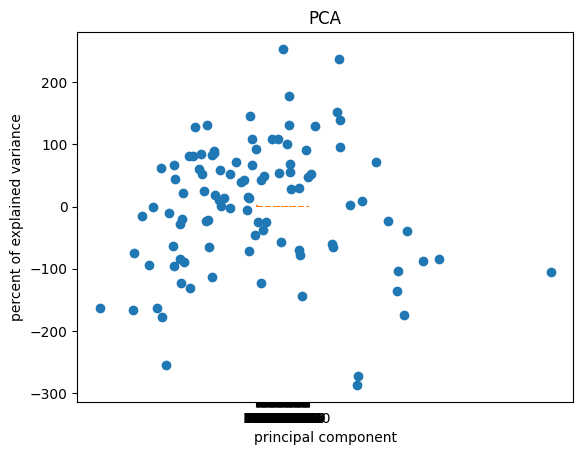

tensor([[-2.1505e+02,  4.0948e+01, -9.8327e+01,  ..., -7.9150e+00,
         -7.0538e+00, -5.7196e-01],
        [-6.0789e+01, -8.5263e+01, -9.2755e+01,  ...,  2.1184e+01,
         -1.1435e+01,  1.0582e+00],
        [-9.2046e+00,  8.2692e+01, -6.9560e+01,  ...,  4.4940e+00,
          3.3759e+00,  1.2130e+00],
        ...,
        [ 1.2006e+02,  1.5221e+02,  1.5763e+02,  ..., -2.0911e+01,
         -6.6593e+00, -6.7536e-02],
        [-3.0683e+01,  1.3420e+02,  1.5828e+01,  ..., -4.3334e+00,
         -1.4335e+00, -4.0760e-01],
        [-7.4854e+01, -4.6021e+01,  1.0957e+02,  ...,  2.7335e+00,
          1.0128e+00, -4.3606e-01]], dtype=torch.float64)
[0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 2 2 0 0 2 3 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0
 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 3 3 0 0 0 0 0 2 1 0 0 0 0 3 0 0
 2 0 0 0 2 3 0 2 0 0 0 0 2 0 0 0 0 2 2 2 2 2 1 0 0 0]
vdcldiclen: 4
idx:  8
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_8.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:18<00:00, 8274.50it/s]


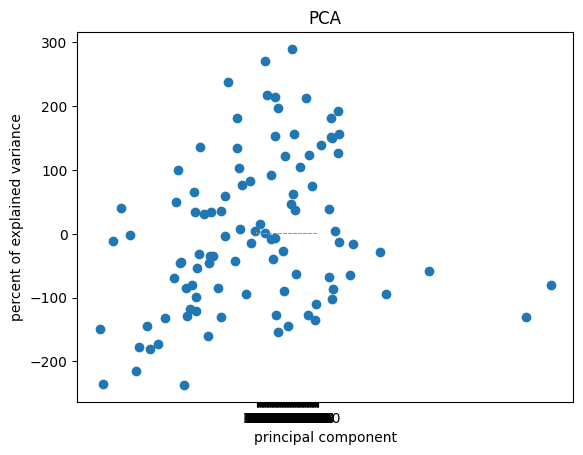

tensor([[-1.2275e+02, -2.3868e+01, -1.0180e+02,  ...,  1.0472e+01,
          2.0476e+01, -7.5811e-01],
        [ 3.7325e+02, -8.8459e+01, -6.0623e+01,  ...,  2.3663e+01,
          3.4698e+01, -1.8834e+00],
        [ 2.4232e+02, -7.0944e+01, -1.2463e+02,  ..., -1.1727e-01,
         -9.9944e+00,  2.0122e-01],
        ...,
        [ 5.6221e+01,  3.5754e+01, -2.0717e+01,  ..., -9.9863e+00,
          3.5212e+00,  4.7856e-01],
        [ 2.2875e+01,  5.3090e+01,  1.8731e+02,  ..., -2.6923e+01,
          1.0324e+01, -1.6709e-02],
        [-2.0215e+01,  4.0541e+01, -6.6801e+01,  ..., -2.9517e+01,
         -1.0097e+01,  6.3482e-01]], dtype=torch.float64)
[0 2 2 1 2 1 3 2 2 0 3 3 1 3 3 2 2 0 0 2 0 2 3 2 1 2 2 0 2 3 2 2 3 3 2 3 1
 3 0 0 3 3 1 2 2 0 0 0 3 3 3 0 2 1 0 2 0 0 3 0 3 2 2 3 3 1 2 3 2 2 3 3 0 1
 3 1 2 1 3 3 2 1 3 2 2 2 3 2 0 0 3 0 3 2 1 0 2 1 2 0]
vdcldiclen: 4
idx:  9
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_9.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:19<00:00, 7861.44it/s]


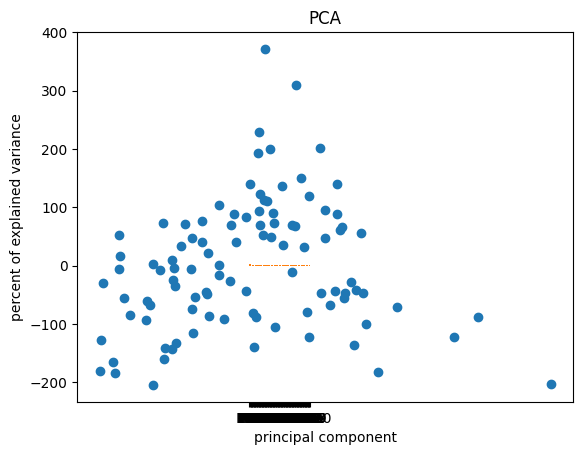

tensor([[-1.1451e+02, -9.3801e+01,  3.3760e+01,  ...,  1.8688e+01,
          2.5033e+01, -1.7772e-01],
        [-3.8911e+01,  2.0281e+02,  1.5278e+02,  ..., -1.1400e+01,
          1.5068e+01, -7.2963e-01],
        [ 1.8099e+01,  1.8533e+02,  1.4270e+02,  ...,  1.9981e+00,
          7.7280e+00,  1.4697e+00],
        ...,
        [ 1.1601e+02,  1.6540e+02, -5.9257e+01,  ..., -1.4154e+01,
          3.2654e+00, -7.5665e-01],
        [ 2.2960e+02,  1.3486e+02,  1.9247e+02,  ...,  1.1579e+01,
         -2.5176e+01,  3.3849e-01],
        [-1.1082e+02, -1.1327e+02,  1.2283e+02,  ...,  2.3439e+01,
          1.2559e+01,  6.3366e-01]], dtype=torch.float64)
[0 1 1 3 3 3 3 1 3 3 0 1 3 3 2 3 0 2 3 0 0 3 0 2 3 3 3 1 0 3 3 3 3 2 1 1 3
 0 3 0 3 3 2 0 0 3 2 0 0 0 3 0 3 2 3 3 0 0 3 1 0 0 3 3 0 0 3 3 3 1 3 3 3 3
 3 2 2 0 0 2 0 3 3 2 0 2 0 3 3 1 3 0 1 3 0 3 0 3 1 0]
vdcldiclen: 4
idx:  10
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_10.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:14<00:00, 10507.51it/s]


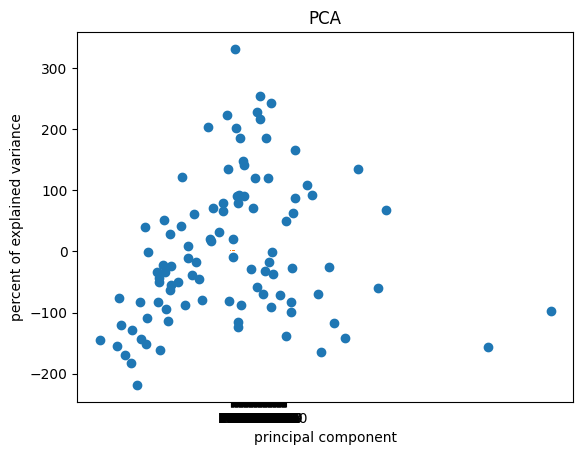

tensor([[ -25.6409,  117.8750,   26.1480,  ...,   -2.9245,    4.4329,
           -0.3011],
        [  74.6035,   17.3412,  -18.7272,  ...,  -10.8378,    3.5545,
           -0.3343],
        [  92.6435,  216.6508,  145.4404,  ...,  -10.4291,  -11.4467,
            0.4880],
        ...,
        [-167.1061,  -94.4972, -139.4281,  ...,   24.4587,    4.3566,
            0.8935],
        [ -52.3141,  -50.8222,   98.6053,  ...,  -25.3298,   -5.3515,
            0.6724],
        [ 180.2188, -242.9872,  174.4453,  ...,   28.1562,    5.3385,
            0.8277]], dtype=torch.float64)
[3 3 2 3 0 2 1 1 3 1 1 2 1 1 1 3 1 1 3 3 3 3 3 2 0 1 1 3 3 3 1 1 1 1 1 1 3
 3 3 3 1 3 1 1 1 3 1 1 0 3 1 0 1 1 3 0 1 3 3 1 1 0 3 3 1 3 2 2 1 3 0 3 1 3
 2 3 1 3 1 1 1 0 1 2 2 1 3 2 1 1 3 1 2 0 2 1 1 1 3 3]
vdcldiclen: 4
idx:  11
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_11.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:20<00:00, 7430.16it/s]


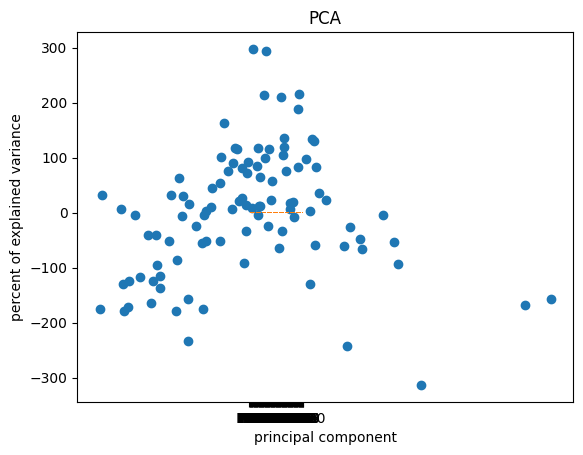

tensor([[ 4.0344e+01, -1.1669e+02,  6.8889e+01,  ..., -3.2800e-01,
          1.0891e+01, -1.6066e-01],
        [-1.0326e+02, -4.0787e+01, -6.1255e+01,  ..., -1.3196e+01,
         -5.8994e+00, -1.2032e+00],
        [-1.0202e+02, -2.4271e+01,  3.0543e+01,  ...,  1.8930e+00,
          6.8159e+00,  7.3551e-01],
        ...,
        [-2.0688e+02, -2.0207e+02, -2.2766e+01,  ..., -2.0572e+01,
          1.4018e+01,  2.7236e-01],
        [-3.8633e+01, -7.6799e+01,  1.4496e+02,  ...,  9.3016e+00,
         -8.0443e+00, -9.4620e-01],
        [-1.9818e+02, -5.1934e+01, -9.4590e+01,  ...,  3.3501e+00,
          7.9003e+00,  2.0075e+00]], dtype=torch.float64)
[3 2 2 1 2 0 2 1 1 2 2 1 2 1 3 0 2 2 2 1 3 2 2 1 2 0 1 0 1 0 1 0 0 1 2 1 0
 2 2 1 2 1 0 1 3 2 2 2 3 1 1 0 1 2 2 2 2 2 1 2 1 1 3 2 0 1 3 1 2 2 0 2 3 1
 0 3 0 2 2 3 1 1 1 1 1 3 1 1 0 1 1 1 1 2 1 3 2 2 2 2]
vdcldiclen: 4
idx:  12
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_12.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9985.17it/s] 


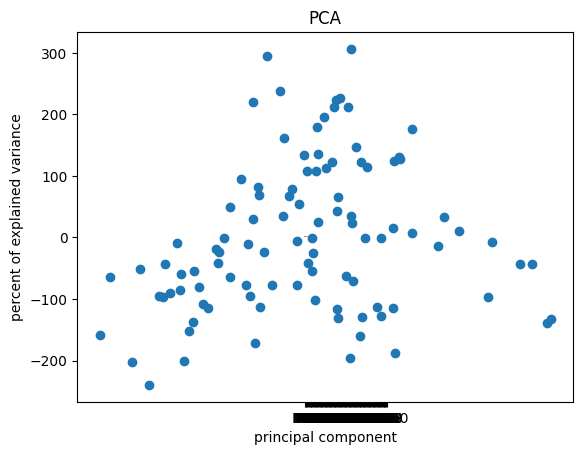

tensor([[-5.3874e+01, -1.1430e+02,  6.0334e+01,  ...,  9.9338e+00,
          2.6527e+00,  4.8383e-03],
        [-8.7048e+01,  7.2976e+01,  6.2013e+01,  ...,  1.2638e+01,
         -1.5110e+01,  4.0928e-01],
        [-2.4124e+02, -2.2207e+02,  9.5024e+01,  ...,  1.6116e+01,
         -4.3916e+00,  6.1425e-01],
        ...,
        [-1.2944e+02, -3.9286e+01, -1.9596e+02,  ...,  4.1935e+00,
         -1.6709e+01,  7.2916e-01],
        [ 1.2358e+02, -5.2990e+01,  1.8473e+02,  ...,  2.2462e+01,
          2.5054e+01,  2.3638e-01],
        [-9.1398e+01, -1.5333e+01,  7.2662e+01,  ...,  2.4542e+01,
          1.0959e+01,  5.3794e-01]], dtype=torch.float64)
[0 3 0 3 0 3 3 2 2 0 3 2 2 0 3 3 3 2 3 2 3 3 1 2 3 0 2 2 0 0 3 1 3 3 2 3 3
 3 2 3 3 0 0 0 3 2 2 3 0 0 2 0 3 2 2 2 2 0 0 2 0 0 3 1 1 3 3 0 2 3 2 2 3 0
 0 1 1 2 2 2 0 3 2 2 0 3 2 3 2 0 2 2 1 3 2 3 0 2 3 0]
vdcldiclen: 4
idx:  13
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_13.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9996.64it/s]


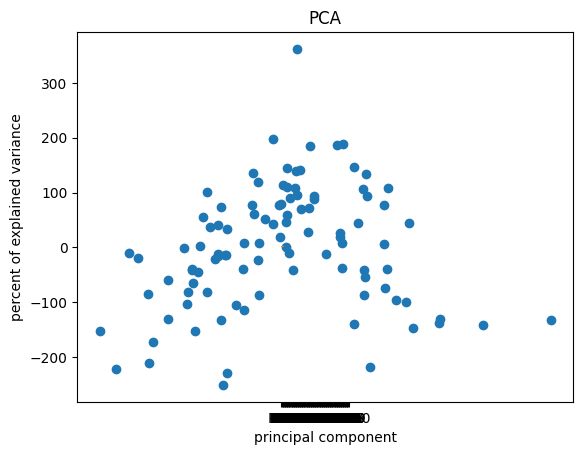

tensor([[-1.1885e+02, -8.3134e+01,  9.1054e+01,  ...,  2.1129e+01,
         -2.0918e+01,  2.4292e+00],
        [-2.2503e+02, -4.3173e+00,  1.8547e+01,  ..., -7.3240e+00,
         -3.0163e+00, -9.5799e-01],
        [ 4.1880e+00,  1.3957e+02,  1.3002e+02,  ...,  3.5926e-01,
         -5.2046e+00,  1.1562e+00],
        ...,
        [ 2.1203e+02, -1.3384e+02,  3.4402e+01,  ..., -2.3973e+00,
          1.1044e+01,  3.7695e-02],
        [ 6.5940e+01,  1.5816e+02,  1.2672e+02,  ..., -2.6090e+01,
         -1.3400e+01,  2.8104e-01],
        [ 1.2202e+02,  6.0527e+01, -8.9374e+00,  ..., -1.4114e+01,
         -3.0217e+01,  1.2787e+00]], dtype=torch.float64)
[3 3 2 0 1 1 2 1 0 0 1 3 3 3 1 0 1 1 3 2 0 2 1 2 1 1 0 1 1 3 1 2 0 2 3 2 2
 0 3 1 1 3 2 1 1 2 3 1 1 1 2 0 3 3 0 1 1 3 0 3 3 0 3 0 2 3 1 2 3 1 1 3 3 1
 1 3 3 3 3 1 1 1 0 1 3 2 3 0 1 3 3 3 1 2 0 0 1 0 0 0]
vdcldiclen: 4
idx:  14
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_14.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:23<00:00, 6375.06it/s]


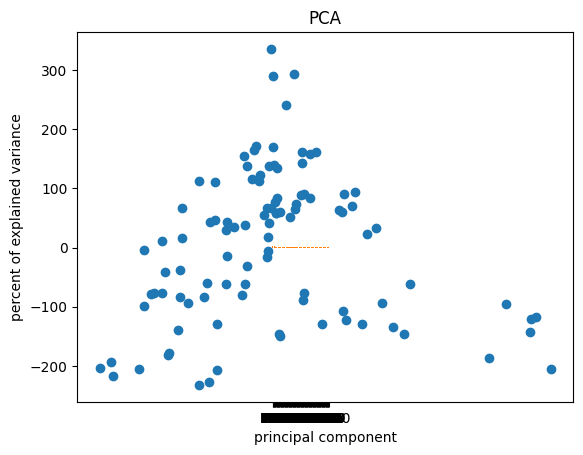

tensor([[ 5.5299e+00,  3.5924e+00, -8.4555e+00,  ..., -8.9566e+00,
          6.2872e-01,  2.3874e-01],
        [-1.3587e+02, -2.0490e+01, -1.8557e+02,  ...,  1.9666e+01,
          4.7936e+00,  2.5386e-01],
        [ 1.4576e+02, -7.5542e+01, -1.9642e+02,  ..., -1.9245e+01,
         -4.9384e+00,  1.3877e+00],
        ...,
        [-3.9962e+01,  1.5541e+02,  1.3108e+01,  ..., -1.3748e+01,
         -1.2250e+00,  1.3017e-01],
        [-1.3676e+02,  3.0059e+01, -1.4635e+02,  ..., -3.4226e+00,
         -3.7304e+00, -6.0875e-02],
        [ 1.4701e+01,  9.7601e+01,  2.2666e+01,  ...,  9.6945e+00,
         -4.3981e+00,  2.5657e-01]], dtype=torch.float64)
[2 3 1 0 3 2 0 1 2 0 3 3 0 2 1 2 0 3 2 0 0 0 1 1 2 2 2 0 0 1 2 1 1 3 0 3 2
 0 2 0 1 0 0 0 0 1 2 1 0 0 2 0 3 3 2 0 3 2 2 0 2 1 3 3 3 0 0 2 3 3 2 3 2 1
 3 0 2 3 3 0 1 2 2 1 2 0 1 1 0 2 3 2 1 3 2 0 0 3 3 3]
vdcldiclen: 4
idx:  15
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_15.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9844.24it/s]


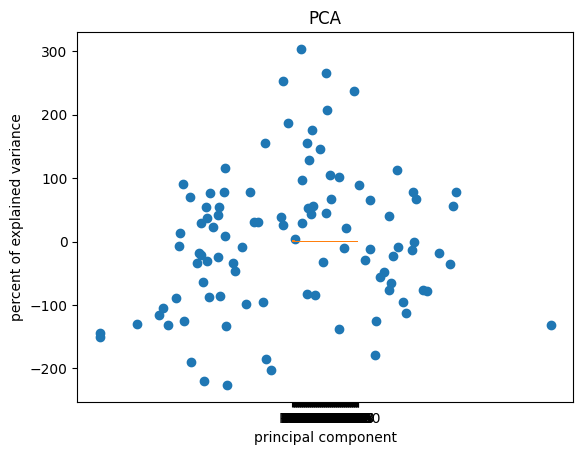

tensor([[-7.6343e+01,  2.3495e+01,  4.9757e+01,  ...,  1.7525e+00,
          1.4256e+01,  1.6428e-01],
        [-2.4736e+01,  6.8444e+01, -3.9158e+01,  ..., -5.9355e+00,
          3.8801e+00,  9.7885e-01],
        [ 3.2395e+01,  2.7260e+01,  1.2539e+01,  ...,  1.4058e+01,
          5.2752e+00,  7.1901e-01],
        ...,
        [ 1.2740e+02,  1.4973e+01, -1.4490e+02,  ..., -3.4438e+01,
         -1.1105e+01, -1.1332e+00],
        [ 4.2410e+02, -2.9748e+02,  4.9530e+01,  ...,  6.8649e+01,
          4.6317e+01, -1.0953e+00],
        [ 3.2976e+01, -3.3652e+01,  2.7924e+01,  ..., -1.2018e+01,
         -2.8348e+01, -7.9353e-01]], dtype=torch.float64)
[0 1 1 2 1 0 2 2 1 2 3 2 2 3 1 3 1 0 0 2 0 2 0 2 0 0 2 0 3 1 1 1 0 0 1 1 1
 1 1 0 3 2 0 0 1 1 3 1 0 1 0 0 1 3 1 1 1 0 1 1 0 1 1 0 0 3 1 1 2 1 2 1 2 1
 1 0 1 3 1 1 2 1 2 3 1 1 1 0 3 1 1 3 1 3 2 0 2 2 2 1]
vdcldiclen: 4
idx:  16
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_16.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:17<00:00, 8479.43it/s]


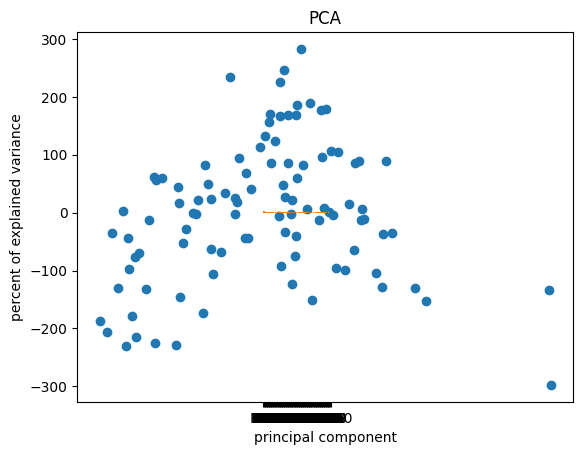

tensor([[-6.4011e+01,  6.6250e+01,  1.2917e+01,  ...,  9.7380e+00,
         -4.3644e+00,  4.8427e-01],
        [ 5.9235e+01, -1.4769e+02,  1.4203e+02,  ..., -1.1097e+01,
         -2.9886e+00,  2.0627e+00],
        [ 1.3448e+02, -1.9044e+02,  3.1733e+02,  ...,  1.6555e+01,
         -6.4750e+00,  5.8017e-01],
        ...,
        [-1.1193e+02,  6.3541e+01, -1.1305e+02,  ...,  2.6847e+00,
         -2.9360e+00, -1.2259e+00],
        [-2.7032e+02, -9.6954e+01,  1.3836e+01,  ...,  1.5456e+01,
         -7.1927e-01, -2.9847e-01],
        [ 5.2748e+02, -1.8979e+02,  1.8914e+01,  ...,  4.6590e+01,
          6.1570e+01, -1.3569e-01]], dtype=torch.float64)
[3 3 3 0 3 2 1 0 1 2 3 2 3 3 0 0 3 3 3 3 0 1 2 1 3 2 0 3 0 0 0 2 3 0 3 0 0
 1 3 3 0 3 3 0 0 3 3 3 3 0 3 3 0 0 0 3 2 3 0 0 3 3 1 2 2 0 0 2 3 0 1 2 3 2
 3 1 1 3 0 3 3 2 2 1 3 3 0 3 0 3 3 2 3 0 1 2 2 3 2 1]
vdcldiclen: 4
idx:  17
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_17.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:18<00:00, 8160.36it/s]


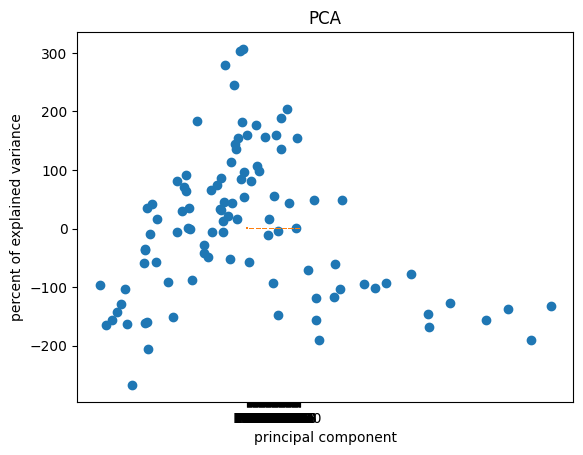

tensor([[ 1.3318e+02,  9.8086e+01,  8.7508e+01,  ..., -1.4921e+01,
          1.1421e+01,  1.1876e+00],
        [-4.2611e+01, -7.2919e+01, -3.9324e+01,  ..., -1.6072e+01,
         -6.1081e+00, -3.0263e-01],
        [-1.6725e+01,  5.4308e+01, -1.8567e+02,  ...,  4.4245e+00,
         -1.0408e-01,  8.1362e-01],
        ...,
        [ 3.5338e+01, -1.2684e+02, -2.2949e+02,  ...,  1.3313e+01,
          1.0020e+01, -1.0171e+00],
        [ 1.4113e+02, -5.6915e+01, -1.6452e+02,  ...,  2.0005e+01,
         -3.4137e+00,  3.0084e-01],
        [ 2.4896e+01,  1.4027e+02, -3.7754e+01,  ..., -7.1762e+00,
         -1.1325e+01,  1.8108e+00]], dtype=torch.float64)
[1 1 0 1 1 0 0 1 0 0 1 3 3 0 1 2 1 3 0 3 0 2 0 3 1 1 0 0 0 2 1 0 1 1 0 1 1
 0 0 1 0 0 0 2 2 0 2 1 0 0 1 0 0 2 0 0 2 1 0 1 0 3 1 3 3 0 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 0 2 1 0 0 3 0 1 1 2 1 1 1 1 1 1 0 0 0]
vdcldiclen: 4
idx:  18
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_18.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9774.72it/s]


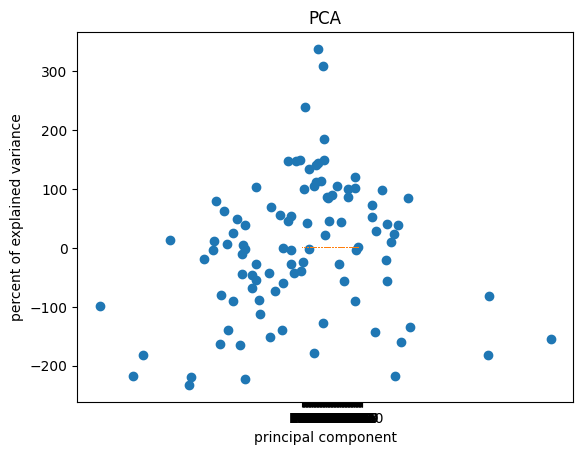

tensor([[-2.1924e+02, -6.2443e+01, -1.4218e+01,  ...,  3.3116e+00,
         -5.2994e+00,  8.4211e-01],
        [-2.3026e+01,  2.1999e+02,  1.9510e+02,  ..., -5.3396e+00,
         -1.3278e+01, -7.0296e-02],
        [-4.2952e+01, -1.5236e+02,  1.9151e+01,  ..., -1.5425e+01,
         -8.0462e+00,  1.4933e+00],
        ...,
        [ 5.0894e+02, -1.1378e+02, -7.6757e+01,  ...,  2.3613e+01,
          6.7195e+00,  1.0966e-01],
        [ 9.5613e+01,  1.3054e+02,  1.0083e+02,  ..., -1.1265e+01,
          2.4950e+01, -9.1272e-01],
        [ 2.8017e+01,  2.0588e+02,  1.4662e+02,  ...,  4.4447e+00,
         -4.6960e+01,  2.2927e-01]], dtype=torch.float64)
[1 2 0 1 0 3 2 2 1 1 3 0 2 1 0 1 3 0 1 1 0 1 2 1 2 1 1 1 2 0 1 2 1 2 2 1 2
 1 1 3 2 1 2 2 0 1 1 3 1 0 3 1 1 3 0 3 0 1 0 3 1 0 1 2 1 2 1 0 0 3 0 2 0 1
 2 1 1 3 2 1 0 0 1 1 3 2 2 2 1 3 0 1 1 1 0 2 2 3 2 2]
vdcldiclen: 4
idx:  19
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_19.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:23<00:00, 6490.12it/s] 


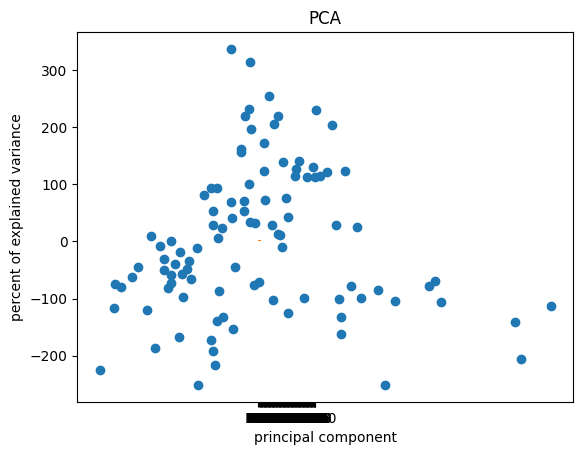

tensor([[ 159.2182,  -94.7718, -246.1369,  ...,   26.4839,   -6.6031,
           -0.6526],
        [-183.8155,  -35.1579, -172.3550,  ...,    6.2368,   -8.7163,
            0.5928],
        [ 185.9196, -147.4264,  -70.9246,  ...,   21.4552,   -7.2554,
            1.4615],
        ...,
        [ -72.6743,  -36.3493,   -9.6074,  ...,    9.1656,   11.2970,
           -1.3121],
        [ -59.6443,   15.8323, -145.2484,  ...,    6.5545,    4.1212,
           -0.6574],
        [-168.3158,   18.1906,   36.7103,  ...,   11.1691,   -6.7943,
           -0.7260]], dtype=torch.float64)
[0 3 0 3 2 2 2 3 2 3 0 3 2 0 0 0 1 1 1 2 2 0 3 3 1 2 3 1 1 0 1 3 3 2 3 1 3
 3 1 2 3 0 3 2 0 3 1 1 2 3 1 0 3 1 2 3 3 3 0 2 2 3 1 2 0 1 3 2 3 2 1 3 3 1
 2 3 3 1 1 1 2 2 2 1 1 2 2 3 3 2 1 3 2 1 3 3 3 3 3 3]
vdcldiclen: 4
idx:  20
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_20.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:17<00:00, 8768.97it/s]


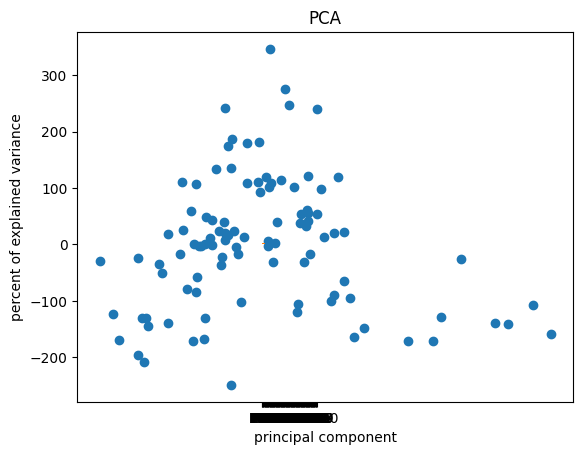

tensor([[ 1.6205e+02, -9.0768e+01, -1.1360e+02,  ...,  1.2413e+01,
         -5.0718e+00,  1.3848e+00],
        [-3.0988e+01,  2.1181e+02,  3.0049e+01,  ..., -2.0121e+01,
          5.1822e+00, -1.3028e-01],
        [-1.3072e+02,  1.9496e+01,  8.3317e+01,  ...,  1.6836e+01,
          1.5901e+01, -6.1325e-03],
        ...,
        [ 6.2943e+01,  3.0199e+02,  1.4046e+02,  ...,  9.7128e+00,
         -1.3297e+01,  5.2175e-01],
        [ 8.2438e+01, -1.0274e+02, -1.4794e+02,  ..., -8.6140e+00,
         -3.1062e+01,  1.4099e+00],
        [ 7.2651e+01, -5.8113e+01,  8.7428e+01,  ...,  7.1475e+00,
         -6.7029e+00,  3.4641e-01]], dtype=torch.float64)
[1 0 3 1 3 1 0 3 1 3 0 1 0 3 0 2 3 0 3 3 1 3 0 0 3 3 0 3 0 3 0 3 0 0 2 3 0
 0 0 0 3 0 0 2 2 3 1 0 3 3 1 0 3 0 0 0 0 0 1 3 3 3 3 3 3 0 1 1 1 0 3 3 0 3
 1 2 2 3 3 1 3 2 0 3 0 3 3 3 0 3 3 1 0 0 1 0 0 0 1 0]
vdcldiclen: 4
idx:  21
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_21.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9798.72it/s] 


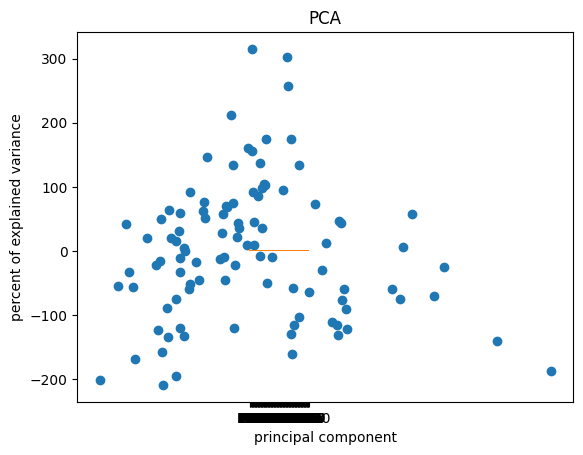

tensor([[-8.5050e+01,  6.8565e+00,  3.4142e+01,  ..., -6.4688e+00,
         -7.2137e+00,  5.9212e-01],
        [ 3.1440e+01,  1.3114e+02,  8.4989e+01,  ..., -2.5276e+01,
         -1.1059e+01,  8.7533e-01],
        [-2.0281e+00,  5.2764e+01, -6.7592e+01,  ...,  2.1210e+01,
          1.5312e+01,  6.6667e-01],
        ...,
        [ 3.9994e+01,  2.1632e+01,  1.9734e+01,  ...,  1.4544e+01,
          1.7519e+01, -2.4736e+00],
        [-1.5730e+01, -1.7015e+01, -1.1226e+02,  ..., -1.4135e-01,
          1.3299e+01,  3.5284e-01],
        [ 6.6410e+01, -1.6592e+02,  1.0842e+02,  ...,  7.7037e+00,
         -1.8747e+01,  1.8485e-01]], dtype=torch.float64)
[1 3 1 1 0 1 2 1 2 3 1 3 1 1 1 3 1 0 1 1 1 1 3 1 1 1 1 2 2 3 1 1 1 3 3 3 1
 1 1 3 3 1 1 2 2 3 1 1 0 0 3 0 3 0 3 1 0 1 1 3 3 1 3 1 1 3 3 1 1 3 1 3 1 3
 3 2 1 0 1 1 3 2 1 0 0 1 1 1 1 1 1 1 3 3 1 0 3 3 1 3]
vdcldiclen: 4
idx:  22
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_22.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:21<00:00, 6999.43it/s] 


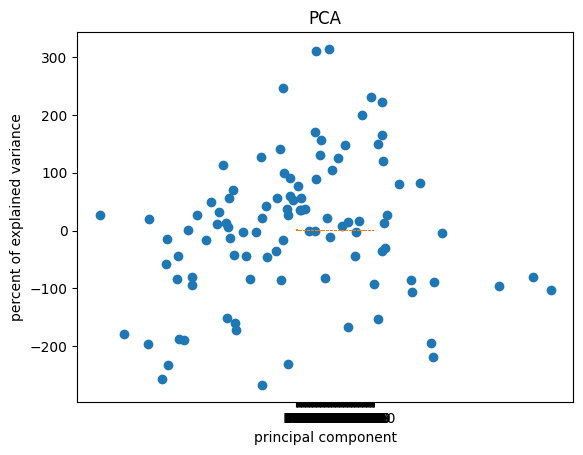

tensor([[ 6.4031e+01,  2.8870e+02,  1.3574e+02,  ..., -8.3727e+00,
         -7.0449e-01,  2.3003e+00],
        [-4.1914e+01, -5.4057e+01, -4.6107e+01,  ..., -9.4096e+00,
          2.7080e+01,  2.0825e+00],
        [ 3.1414e+01,  7.5530e+01, -1.7531e+02,  ...,  2.3700e+00,
          3.2346e+00,  1.6160e-01],
        ...,
        [ 3.1097e+01, -1.3148e+01, -4.4756e+01,  ...,  1.7526e+01,
          3.1593e+01, -2.2776e+00],
        [-9.8483e+00,  6.8038e+01,  5.6045e+00,  ...,  1.9430e+01,
         -3.3038e+00, -6.8699e-01],
        [ 1.5881e+01, -4.6839e+01, -2.3979e+02,  ...,  2.4029e+01,
         -1.5960e+00, -3.6364e-01]], dtype=torch.float64)
[3 2 1 2 2 2 3 2 0 2 3 3 2 3 2 2 2 2 3 3 2 3 1 1 1 2 3 1 1 3 3 3 3 1 2 2 3
 2 3 3 2 2 2 2 1 3 3 2 2 2 1 0 1 3 3 1 2 3 1 1 1 1 1 3 3 1 2 2 2 1 2 2 1 2
 2 3 3 1 3 2 1 3 1 2 3 3 1 2 3 3 2 2 2 3 3 2 2 2 2 1]
vdcldiclen: 4
idx:  23
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_23.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:27<00:00, 5507.75it/s]


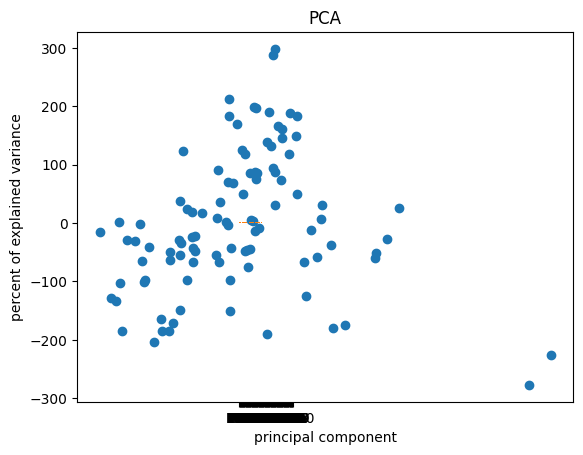

tensor([[ 4.7072e+01,  1.8105e+02,  1.6947e+02,  ..., -6.3887e+00,
         -8.5289e+00,  1.7944e-02],
        [-5.4937e+01, -1.3891e+01, -6.0702e+01,  ..., -2.3161e+01,
          1.6451e+01,  1.2856e+00],
        [ 1.9397e+02, -3.3057e+01, -6.0067e+01,  ...,  2.1894e+01,
         -2.4267e+01, -1.5271e+00],
        ...,
        [ 5.0243e+01, -2.8208e+01,  1.6645e+02,  ...,  2.4300e+01,
          2.1621e+01, -8.8087e-01],
        [-1.1782e+02, -5.0012e+01, -1.1502e+00,  ...,  5.3641e+00,
          1.1687e+01, -1.6338e+00],
        [-5.3919e+00, -4.3643e+01, -1.4632e+02,  ...,  4.1502e+01,
         -1.7991e+01,  1.1660e+00]], dtype=torch.float64)
[0 1 0 1 1 2 1 0 2 0 1 1 2 2 1 0 2 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 2 0 1 0 1
 1 2 1 2 1 1 2 1 1 2 1 2 3 1 0 0 1 1 0 1 0 1 2 3 2 3 0 2 1 1 1 0 1 0 1 0 1
 0 1 0 1 2 2 2 2 0 2 0 1 1 2 2 2 1 0 1 2 1 2 1 0 2 0]
vdcldiclen: 4
idx:  24
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_24.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9875.83it/s]


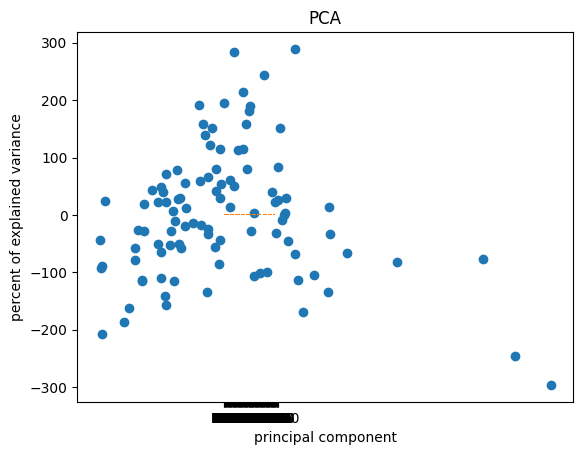

tensor([[ 2.3428e+02, -9.3565e+01,  1.0385e+01,  ..., -5.3307e+00,
          1.1262e+01, -1.8264e+00],
        [ 6.3287e+01,  4.4977e+01,  5.5676e+01,  ..., -6.4708e+00,
         -9.9923e-01,  1.1176e+00],
        [-4.9880e+01,  5.4028e+01,  3.3710e+01,  ..., -2.7445e+00,
         -7.8582e+00,  1.6963e-01],
        ...,
        [ 3.1555e+02, -8.6899e+01, -1.5307e+01,  ..., -2.2052e+01,
          4.9023e+00,  1.5023e+00],
        [-1.0067e+02,  5.2427e+01, -1.4521e+02,  ..., -9.1568e+00,
         -1.5939e+00,  5.3704e-01],
        [-5.0484e+01,  1.8852e+02,  1.7029e+02,  ..., -1.4392e+00,
         -1.2032e+00,  5.5463e-01]], dtype=torch.float64)
[1 1 3 1 1 2 1 3 2 3 3 1 2 3 3 3 2 2 1 1 1 3 2 3 0 2 2 3 0 3 2 3 3 3 2 3 2
 3 3 3 1 1 3 3 2 1 3 2 1 2 0 0 1 3 2 2 2 1 3 3 3 1 0 3 1 3 3 2 3 0 2 2 3 1
 1 0 3 0 0 2 1 0 1 0 1 0 1 3 3 1 3 0 2 3 1 1 3 1 0 3]
vdcldiclen: 4
idx:  25
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_25.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:19<00:00, 7764.58it/s]


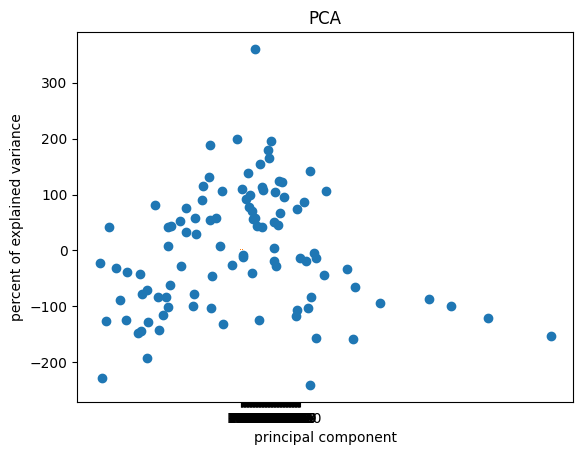

tensor([[-4.7054e+01,  1.4041e+02,  9.6267e+01,  ..., -8.5577e+00,
         -1.7649e+00,  1.1941e+00],
        [-9.8897e+00, -4.2514e+01, -1.4855e+02,  ...,  7.2310e+00,
          2.0306e+01,  6.6857e-01],
        [ 1.8097e+01,  2.6398e+02,  9.7063e+01,  ..., -7.2362e+00,
         -1.6278e+01, -4.2043e-01],
        ...,
        [ 7.7406e+01,  1.5844e+02, -2.2167e+01,  ...,  7.1273e+00,
         -1.0546e+01,  8.0279e-02],
        [-2.8482e+02, -1.5701e+02,  2.4905e+01,  ...,  1.0306e+01,
         -1.2986e+01,  1.5274e+00],
        [-2.3135e+02, -9.3468e+01, -1.6268e+01,  ...,  9.5187e+00,
         -5.9914e+00,  1.1561e+00]], dtype=torch.float64)
[0 3 0 3 1 3 3 3 3 2 3 3 0 2 3 0 3 2 3 3 3 3 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3
 3 2 3 3 0 0 3 3 3 3 3 3 2 3 0 3 2 2 0 3 3 3 0 3 0 2 3 3 3 3 0 3 3 3 3 0 3
 3 0 3 0 2 2 3 3 2 3 0 0 1 0 3 3 3 3 3 3 0 1 2 2 3 3]
vdcldiclen: 4
idx:  26
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_26.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:18<00:00, 8126.01it/s]


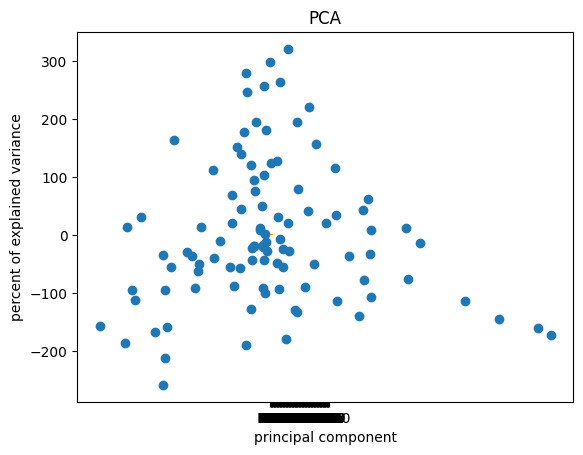

tensor([[-1.6799e+02, -9.6638e+01,  5.9162e+01,  ..., -1.9917e+01,
          1.0916e+01,  5.7632e-02],
        [-1.0991e+02, -1.2739e+02,  6.3534e+01,  ..., -1.1614e+01,
          1.8193e+01,  1.4581e+00],
        [-1.6567e+01,  1.7218e+01, -6.1596e+01,  ...,  1.8895e+00,
         -1.0467e+00, -2.8710e-01],
        ...,
        [ 6.8094e+01, -5.1597e+01, -3.7203e+01,  ...,  9.4646e+00,
         -1.4339e+01, -8.8557e-01],
        [-6.6558e+01, -1.8548e+01,  5.5732e+01,  ...,  1.4856e+01,
         -6.9894e+00, -4.1732e-01],
        [-1.4389e+02, -6.9452e+01,  6.3266e+01,  ..., -7.3617e+00,
         -2.8820e+00, -7.2036e-01]], dtype=torch.float64)
[2 2 1 2 2 1 3 0 2 2 0 2 3 2 0 2 2 2 3 0 2 2 2 1 2 1 3 3 2 3 3 2 1 3 2 3 1
 1 1 2 3 2 1 2 1 1 1 1 2 0 2 0 3 2 0 2 2 2 2 2 3 1 0 1 1 0 3 3 1 3 2 2 2 2
 2 0 2 2 2 1 0 2 2 2 0 2 2 0 2 3 3 2 1 1 2 1 1 2 2 2]
vdcldiclen: 4
idx:  27
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_27.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:14<00:00, 10098.37it/s]


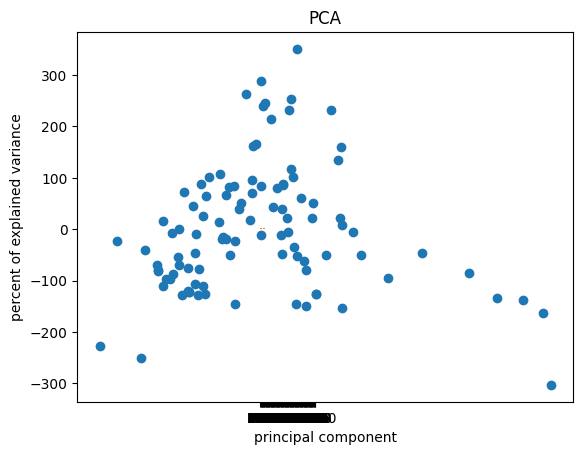

tensor([[ 1.3150e+02,  1.3095e+02,  1.4556e+02,  ...,  8.5244e-01,
         -1.4343e+01, -8.0630e-01],
        [-1.6371e+02, -7.7445e+01, -1.9140e+02,  ...,  3.3181e+01,
          1.3601e+01,  3.4696e-01],
        [-8.1420e+01, -1.0590e+02,  1.0197e+02,  ..., -5.6031e+00,
         -8.8936e+00,  8.6837e-01],
        ...,
        [ 2.3754e+01,  2.8289e+02,  1.0751e+02,  ..., -1.8416e+01,
          2.8579e+01, -1.3011e+00],
        [-1.7181e+02, -1.0380e+02,  4.4996e+01,  ...,  2.1145e+00,
          2.2804e+00,  2.4986e-01],
        [-3.6393e+01,  6.3368e+01,  6.3342e+01,  ...,  2.8114e+00,
         -1.4045e+01, -8.8488e-01]], dtype=torch.float64)
[3 1 2 3 2 2 3 2 0 3 2 2 3 2 3 1 2 0 3 3 3 3 1 2 3 3 2 1 3 1 3 1 1 3 1 2 2
 2 1 3 3 3 1 1 1 0 3 3 1 3 2 0 1 2 3 3 3 3 3 1 3 3 3 0 3 1 2 3 2 2 3 1 1 0
 2 3 2 1 3 0 3 1 1 1 1 3 3 1 3 2 0 3 2 2 3 0 1 0 2 3]
vdcldiclen: 4
idx:  28
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_28.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:25<00:00, 5893.64it/s] 


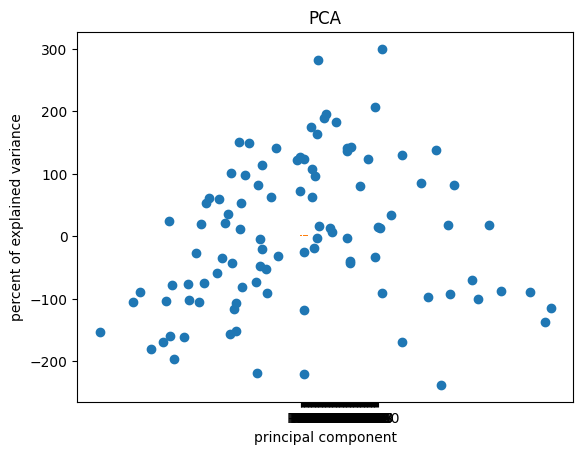

tensor([[  33.2528,  -86.5582,   59.4604,  ...,  -23.6987,  -13.1765,
           -1.3990],
        [ 171.7435,   25.2415, -162.4464,  ...,  -10.7849,   -6.2511,
           -2.2214],
        [ 132.7021,  -77.9741,  -49.0960,  ...,   -6.4583,   -2.6283,
            0.2988],
        ...,
        [  38.1696,   91.6430,  146.3167,  ...,  -12.2710,  -22.0774,
           -0.5814],
        [-157.4849,   65.9282,    6.2995,  ...,   22.4001,   -1.8021,
           -0.7988],
        [ -24.4752,   33.9314,  -13.6167,  ...,  -12.8663,   15.4540,
            0.5117]], dtype=torch.float64)
[3 1 1 1 0 2 2 3 3 2 2 0 3 1 1 1 3 2 2 2 2 1 3 3 2 0 3 1 3 1 2 1 3 2 1 1 2
 1 3 2 1 1 2 2 3 2 2 1 3 2 3 0 2 2 3 0 1 3 3 2 2 1 2 1 1 3 3 0 2 3 0 0 1 2
 3 1 2 3 2 1 1 2 1 3 0 2 2 2 2 2 2 0 3 3 2 1 3 3 2 2]
vdcldiclen: 4
idx:  29
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_29.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9280.94it/s]


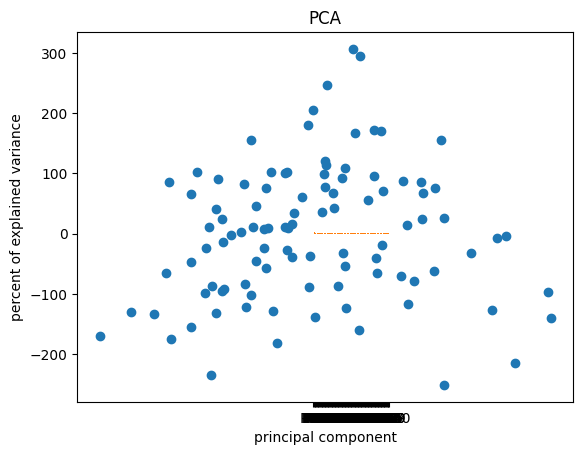

tensor([[ 27.2504, 199.5989,  56.9456,  ...,   1.5494, -13.4059,  -0.6892],
        [ 26.3363,  13.5793, -52.4038,  ...,  -3.9570,  18.9152,   0.8003],
        [-57.9647,  -8.0575,  28.9890,  ..., -21.8134,   0.8778,  -0.9994],
        ...,
        [-48.6772, 121.9654, -43.8272,  ...,  -2.0528,  -0.8131,  -1.5340],
        [-62.3412, 115.5882,  52.1131,  ...,   2.6673, -10.0119,  -0.4058],
        [ 63.6560, 107.3136, 144.3311,  ...,   9.5013, -14.3966,  -2.0800]],
       dtype=torch.float64)
[1 1 2 0 2 1 2 2 2 1 0 2 3 2 3 3 3 2 2 2 2 3 3 0 2 0 2 3 0 2 1 1 1 2 2 3 1
 3 2 3 2 2 2 2 2 3 2 3 2 1 1 0 2 3 0 0 1 2 2 3 3 0 3 1 2 1 2 2 0 2 3 3 2 1
 1 2 2 3 0 3 0 2 1 1 2 3 3 3 2 2 2 1 2 3 1 1 3 1 1 3]
vdcldiclen: 4
idx:  30
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_30.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9292.40it/s] 


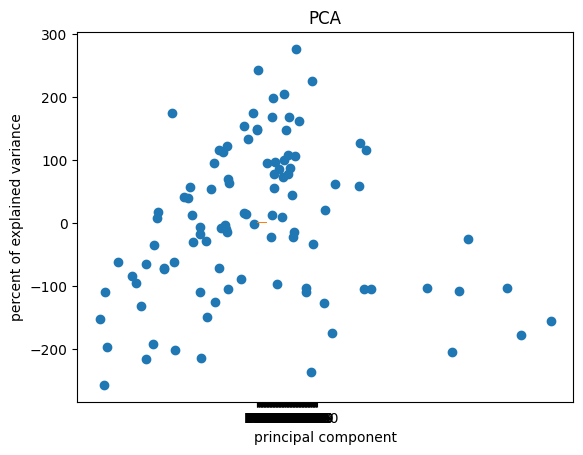

tensor([[ 3.8843e+01,  1.3615e+02,  1.4610e-01,  ...,  1.2685e+01,
         -2.8544e+01,  2.9918e-01],
        [-3.7902e+01,  3.1681e+00, -1.1780e+02,  ..., -3.4060e+00,
          6.9695e+00,  3.2053e-01],
        [ 9.5594e+01,  1.3571e+02,  1.2276e+02,  ..., -9.6143e+00,
         -1.0252e+01, -7.7490e-01],
        ...,
        [ 7.2248e+00, -4.5114e+01,  9.5521e+00,  ..., -2.1877e+01,
         -1.7496e+00,  1.3213e+00],
        [ 5.1299e+02, -1.6705e+02, -1.4785e+02,  ..., -1.7987e+01,
          7.8807e+01,  1.5315e+00],
        [-9.5676e+01,  1.1763e+01, -7.9364e+00,  ...,  1.3350e+01,
          3.6113e+00, -2.9371e-01]], dtype=torch.float64)
[3 1 2 3 1 3 1 3 2 0 3 2 2 3 2 3 3 2 2 3 2 1 1 1 2 3 3 2 3 3 1 3 2 2 3 1 1
 2 2 3 3 3 0 3 3 3 2 0 3 2 1 0 3 3 3 3 3 2 2 3 3 1 2 2 3 3 2 3 2 3 3 2 3 3
 2 2 3 3 1 2 2 2 2 1 2 1 3 3 2 2 3 3 1 1 3 2 2 3 0 2]
vdcldiclen: 4
idx:  31
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_31.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9345.94it/s] 


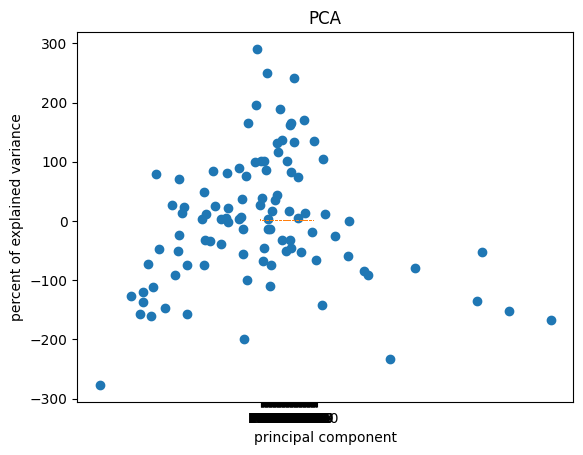

tensor([[ 4.8006e+00, -7.0000e+01, -1.5123e+02,  ..., -1.2013e+01,
         -1.2428e+01, -2.4087e-01],
        [ 2.9119e+01,  2.6670e+02,  1.0777e+02,  ..., -1.5464e+01,
         -1.0502e+01, -4.2606e-01],
        [ 2.1033e+02, -6.3200e+00, -6.0381e+01,  ...,  2.1932e+01,
         -5.6134e+00, -2.4869e+00],
        ...,
        [ 4.6972e+02, -1.5430e+02, -1.2238e+02,  ...,  7.9915e+00,
          7.2859e+01, -9.5148e-01],
        [-8.7002e-01,  2.5532e+02,  1.6868e+02,  ..., -5.7118e+00,
          2.5797e+01,  1.8792e-01],
        [ 3.6815e+01, -8.3501e+01, -1.9361e+02,  ..., -1.0173e+01,
         -7.0920e+00, -1.1341e+00]], dtype=torch.float64)
[2 3 1 0 0 2 1 3 0 2 0 3 2 1 0 2 0 1 0 3 3 2 2 0 0 0 3 2 1 0 3 2 0 0 2 0 3
 3 1 0 0 0 2 0 2 0 3 2 3 0 3 0 3 2 2 0 0 3 2 2 0 3 2 0 0 0 2 2 2 2 2 1 2 2
 1 0 2 2 0 2 0 0 3 0 3 3 0 3 1 2 2 0 3 2 0 0 0 1 3 2]
vdcldiclen: 4
idx:  32
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_32.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9346.89it/s] 


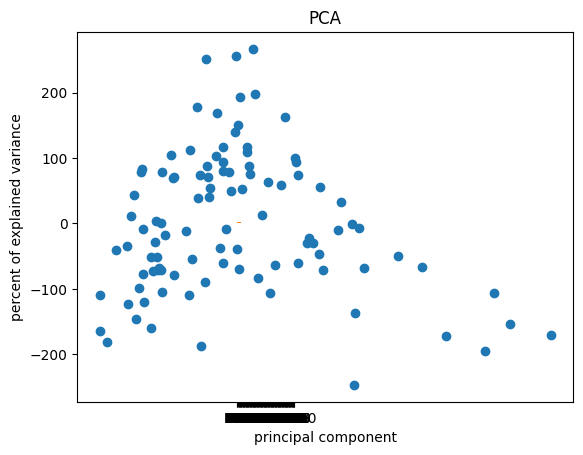

tensor([[ 9.7984e+01,  1.2940e+02,  1.1340e+02,  ..., -9.5442e+00,
         -8.0710e+00, -1.6723e-01],
        [-2.2580e+01,  7.2468e+01,  4.3898e+01,  ...,  9.6563e+00,
         -4.6319e+00, -4.2072e-01],
        [-4.2272e+01, -3.4087e+01,  2.8503e+01,  ...,  5.0909e+00,
         -1.0161e+00, -3.0791e-01],
        ...,
        [-2.2758e+02, -5.0514e+01, -1.6218e+02,  ...,  1.2284e+01,
         -1.9878e+01, -4.0727e-01],
        [ 6.4262e+01,  3.9649e+00,  6.3562e+01,  ...,  1.2733e+01,
          2.0086e+01,  1.4411e-01],
        [ 3.7056e+02, -2.0867e+02,  1.9278e+02,  ...,  5.3835e+01,
          3.5185e+01,  9.7328e-02]], dtype=torch.float64)
[0 0 0 0 0 3 1 3 0 1 0 0 1 0 0 2 0 0 1 3 0 2 1 1 2 0 2 3 0 0 0 2 0 1 3 0 0
 1 3 2 1 1 3 0 1 3 1 0 1 1 1 0 1 0 0 1 0 1 3 1 0 0 1 2 1 0 1 0 0 0 1 3 0 1
 0 1 0 0 1 1 0 1 0 3 3 3 3 0 3 1 0 0 3 2 3 1 0 3 0 1]
vdcldiclen: 4
idx:  33
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_33.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:18<00:00, 8390.02it/s]


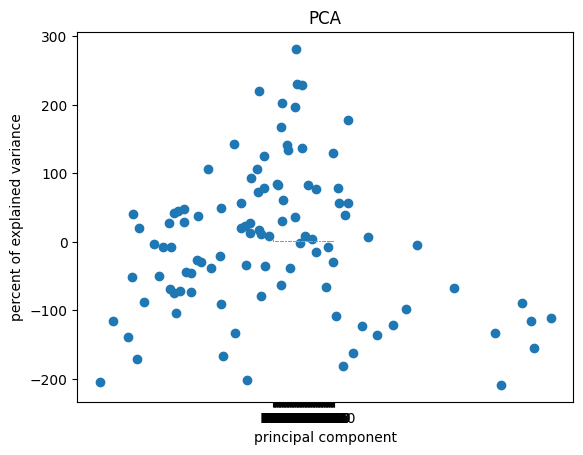

tensor([[ 1.1661e+02, -1.0307e+02, -1.2060e+02,  ..., -2.0358e+01,
         -2.8691e+00,  2.9025e-01],
        [ 1.6633e+02, -4.6730e+01, -1.9977e+01,  ..., -4.4722e+01,
          4.3128e+01,  1.0170e+00],
        [ 2.2552e+01,  1.3401e+02,  2.5693e+01,  ..., -2.5571e+01,
         -9.8148e+00,  5.5136e-01],
        ...,
        [ 3.2352e+00,  2.4838e+02,  4.2054e+01,  ...,  4.5208e-01,
          7.3142e+00,  7.9091e-01],
        [-7.5711e+01, -5.0540e+01, -1.5400e+01,  ...,  5.4073e+00,
         -3.5223e+00, -1.2523e+00],
        [-5.9288e+01, -4.0352e+01,  7.1804e+01,  ..., -1.6550e+01,
         -3.5078e-01, -1.3514e-01]], dtype=torch.float64)
[3 3 0 1 2 0 3 1 1 1 1 1 1 2 0 2 1 1 3 3 3 1 1 2 1 3 1 1 3 0 0 2 0 1 1 3 3
 1 1 3 0 3 3 1 1 0 2 1 2 0 0 0 1 0 0 1 0 1 1 1 1 3 1 3 1 1 0 0 3 1 1 1 1 3
 1 0 3 1 3 1 1 0 3 1 1 3 1 1 0 1 0 3 1 2 3 1 0 0 1 1]
vdcldiclen: 4
idx:  34
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_34.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9735.83it/s]


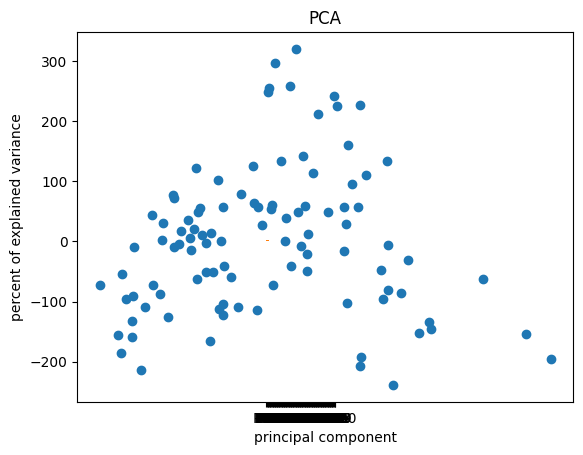

tensor([[ 7.4004e+01,  1.6090e+02,  1.6630e+02,  ..., -3.6455e+01,
         -1.3926e+01, -3.7626e-02],
        [-4.2542e+01, -3.8950e+00, -5.7454e+01,  ...,  6.1770e+00,
         -5.9510e+00, -6.4757e-01],
        [-7.5120e+01,  2.3544e+01, -2.5901e+01,  ..., -9.2089e+00,
         -1.1332e+00,  1.8544e+00],
        ...,
        [ 7.3788e+01,  6.7157e+01, -5.1492e+01,  ..., -9.8525e+00,
         -1.8339e+01, -1.2429e-01],
        [ 2.3777e+02, -1.7886e+01, -1.6976e+02,  ..., -2.0057e+00,
         -6.1172e+00,  5.3608e-01],
        [-4.0472e+01, -2.0089e+02, -1.1489e+02,  ...,  1.0059e+01,
          3.7924e+01, -1.8035e+00]], dtype=torch.float64)
[0 3 1 2 3 2 3 3 0 1 1 3 3 1 2 2 1 1 1 3 3 1 3 1 1 3 1 2 3 3 1 3 3 1 1 1 3
 3 1 1 3 1 1 1 3 1 3 3 1 3 3 0 2 2 3 3 1 1 3 1 3 0 0 2 3 2 1 3 3 3 0 2 3 1
 1 1 1 1 3 3 1 1 1 3 0 3 2 0 1 1 3 1 3 1 1 3 0 1 2 1]
vdcldiclen: 4
idx:  35
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_35.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9841.67it/s]


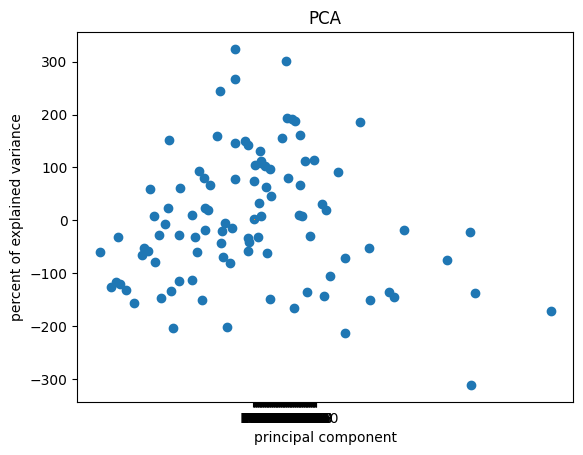

tensor([[-1.7519e+02, -6.6331e+01, -1.8800e+02,  ...,  1.9420e+01,
         -1.2405e+01,  3.9802e-01],
        [-1.6193e+02, -9.5752e+01,  1.3930e+01,  ...,  4.3862e+00,
         -3.0171e+00, -4.5407e-01],
        [ 4.6837e+01,  1.9989e+02,  1.8604e+02,  ..., -1.0702e+01,
         -3.1505e+01,  4.6664e-01],
        ...,
        [ 1.8583e+02, -3.4430e+01,  7.8288e+01,  ...,  1.2963e+01,
          4.1330e+00,  4.2210e-01],
        [-1.2897e+02, -1.9030e+02,  1.3738e+02,  ..., -1.9400e+00,
          6.7536e+00,  7.1227e-01],
        [-2.2977e+02, -4.2998e+01,  1.5274e+01,  ...,  8.7302e+00,
          1.4019e+01, -2.9089e-02]], dtype=torch.float64)
[3 3 1 1 0 2 1 2 3 0 1 3 0 0 3 2 1 1 1 1 3 1 3 1 1 1 3 0 3 2 1 2 3 1 3 1 1
 1 3 1 1 1 1 3 1 3 1 1 1 1 0 0 1 3 1 1 1 3 0 3 1 3 3 3 1 3 3 0 2 0 3 3 1 2
 0 0 2 3 1 1 1 1 3 1 1 3 3 3 3 1 3 0 3 3 3 1 1 0 3 3]
vdcldiclen: 4
idx:  36
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_36.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9793.66it/s]


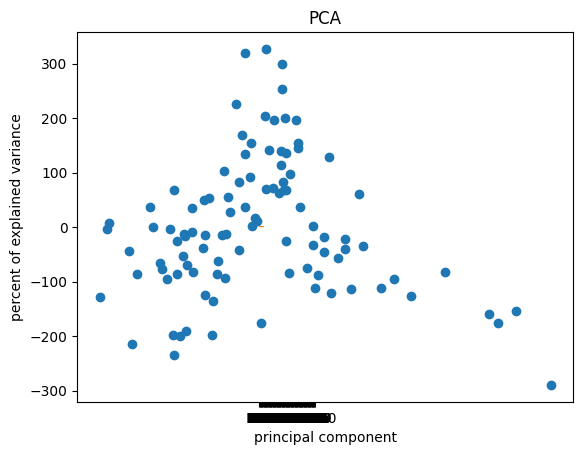

tensor([[-8.3012e+01, -2.0428e+01, -1.2425e+02,  ..., -1.6207e+01,
         -1.0435e+01, -3.5914e-01],
        [-1.1690e+01,  9.8106e+01, -8.2343e+01,  ...,  3.3501e+00,
          1.0611e+01,  1.1399e+00],
        [ 5.1353e+02, -1.1229e+02, -5.7103e+01,  ...,  1.1467e+01,
          2.3233e+01,  6.0613e-01],
        ...,
        [ 1.2035e+02,  3.5549e+01, -1.3433e+02,  ..., -2.1617e+01,
         -1.9247e+01, -2.0648e-01],
        [ 6.7221e+01, -1.1357e+02,  2.3643e+02,  ...,  3.0191e+01,
          1.9937e+01, -2.4616e+00],
        [ 4.8477e+02, -6.2144e+01, -1.0643e+02,  ..., -2.0292e+00,
          2.9482e+01, -5.0222e-02]], dtype=torch.float64)
[1 0 3 1 0 0 0 0 1 3 0 0 0 2 1 1 2 1 2 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 2 1 0 0 0 0 3 0 0 0 0 0 1 1 0 0 1 2 1 2 0 1 0 1 0 0 3 0 0 0 1 1
 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 3]
vdcldiclen: 4
idx:  37
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_37.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9331.13it/s]


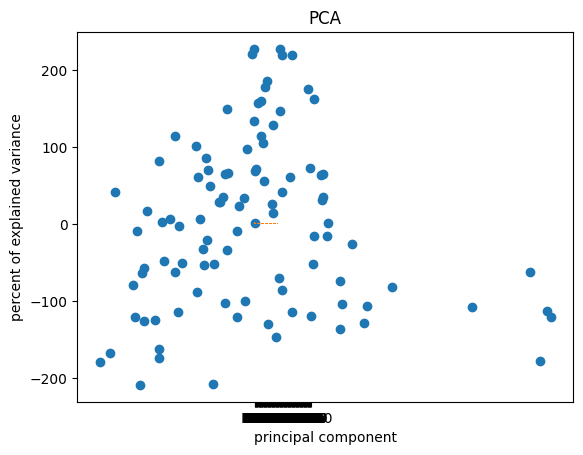

tensor([[ 9.5219e+01,  1.4621e+02,  7.2920e+01,  ...,  1.1245e+01,
         -1.6905e+01,  4.0823e-02],
        [ 1.4545e+02,  2.9646e-01,  3.5522e+01,  ...,  1.3195e+01,
         -1.1859e+01,  1.2802e+00],
        [-2.4675e+01, -9.3828e+01,  9.9433e+01,  ..., -1.7256e+01,
          1.5542e+01, -2.6313e-01],
        ...,
        [ 1.7949e+02, -1.0107e+02,  5.7715e+01,  ..., -8.8842e+00,
         -5.5791e+00,  5.4891e-01],
        [-2.5957e+02, -5.5960e+01, -1.2125e+02,  ..., -4.1824e+00,
         -1.1691e+01,  8.7072e-01],
        [-4.5237e+01, -2.2077e+00, -6.3046e+01,  ..., -1.6797e+01,
          1.5973e+00,  5.3779e-01]], dtype=torch.float64)
[0 1 0 0 0 2 2 0 1 0 1 1 0 0 0 0 0 3 0 0 1 3 3 0 0 0 1 0 1 1 0 0 0 1 3 3 0
 2 1 1 1 0 0 0 3 0 0 0 3 0 1 0 2 3 0 2 1 1 0 3 1 0 0 0 0 2 3 0 0 3 2 3 0 0
 1 0 3 0 1 0 3 1 1 0 0 2 1 1 1 0 0 0 0 1 0 0 2 1 2 0]
vdcldiclen: 4
idx:  38
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_38.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9094.51it/s]


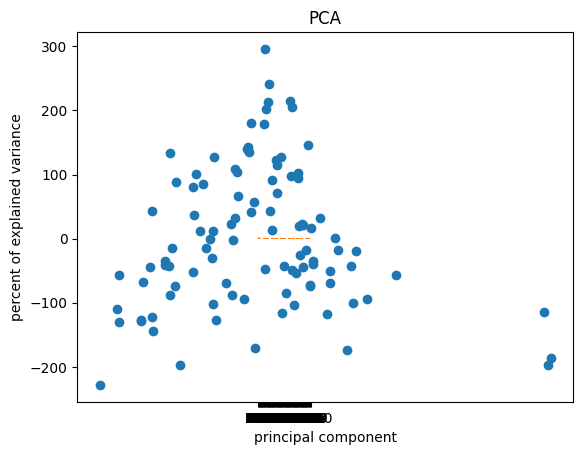

tensor([[-1.2679e+02, -2.1997e+01, -7.4777e+01,  ...,  9.9088e-01,
          3.1234e+01,  9.1082e-01],
        [-1.4505e+02,  5.3705e+01,  9.2635e+01,  ...,  1.2563e+01,
         -1.8964e+01,  3.0743e-01],
        [-1.6273e+02, -8.6165e+01,  8.2451e+01,  ...,  1.5237e+01,
          7.6881e+00, -1.2698e+00],
        ...,
        [ 4.8131e+02, -1.2797e+02, -1.0186e+02,  ...,  1.4215e+01,
          4.6423e+01, -9.5657e-02],
        [ 3.2991e+00,  3.7964e+01,  7.6385e+01,  ..., -2.2269e+01,
         -9.0791e+00,  8.5418e-01],
        [ 5.2014e+01,  3.1112e+02,  1.4854e+02,  ...,  9.7197e+00,
         -1.5962e+01, -9.6653e-01]], dtype=torch.float64)
[3 3 3 2 1 3 0 3 3 3 1 1 3 3 1 2 1 3 3 3 0 1 1 0 3 1 3 3 3 1 0 1 1 3 3 1 1
 3 3 3 2 0 1 3 2 1 1 1 3 1 3 1 3 2 0 1 1 3 1 2 1 1 3 3 1 3 1 1 2 3 2 0 1 1
 1 3 3 0 3 2 1 3 1 1 1 3 3 0 1 1 1 3 1 3 1 3 3 2 1 0]
vdcldiclen: 4
idx:  39
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_39.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:15<00:00, 9844.91it/s]


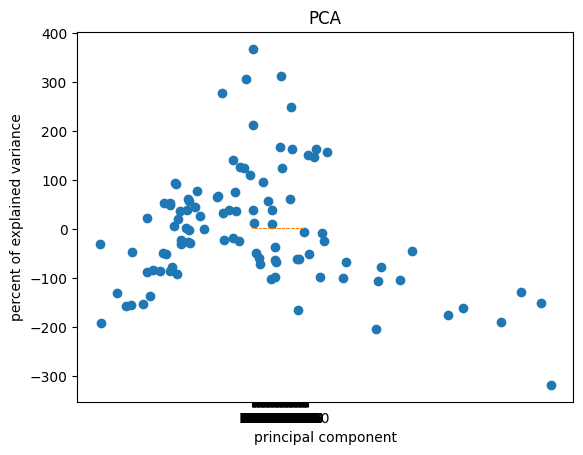

tensor([[ 124.8834,  -23.8228,  128.9899,  ...,  -24.5533,   12.1291,
            0.5769],
        [-155.3812,   22.6790,  -29.9504,  ...,    2.3030,   -5.5279,
           -1.2606],
        [  73.3634, -129.8612,   -3.6957,  ...,   -2.1916,   -5.2978,
           -2.0325],
        ...,
        [ -26.0772,   21.4741,   34.3093,  ...,    5.0504,   25.2714,
            1.1150],
        [ -90.5156,   -0.5285,   -1.7400,  ...,    7.9954,    5.2157,
           -0.3142],
        [  75.8446,  -73.1196,  150.3528,  ...,   17.5199,  -15.6089,
            0.6317]], dtype=torch.float64)
[2 1 1 2 2 2 1 0 1 2 2 1 1 2 3 1 2 1 1 1 2 2 2 1 1 3 1 1 2 2 2 1 2 1 3 2 2
 3 2 2 1 2 2 3 2 3 0 3 1 1 3 0 2 1 3 1 1 1 3 3 1 1 1 3 0 3 3 2 1 1 3 1 3 1
 2 1 2 2 1 1 1 2 2 1 2 2 2 3 3 1 1 1 1 3 1 2 3 2 1 3]
vdcldiclen: 4
idx:  40
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_40.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:24<00:00, 6278.56it/s]


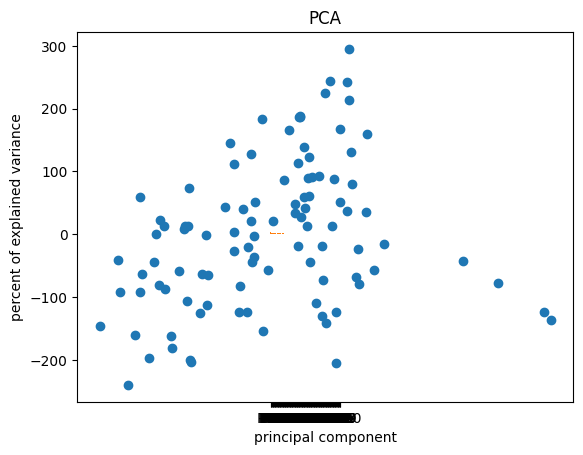

tensor([[ 2.1080e+01,  3.1411e+02,  1.1379e+02,  ..., -3.4629e+00,
         -6.3662e+00, -5.1104e-01],
        [-1.5783e+02, -2.0799e+01,  8.3914e+00,  ...,  5.1744e+00,
         -4.1725e+01,  3.2543e-01],
        [ 2.7085e+02, -1.0182e+02, -9.1201e+01,  ...,  2.0232e+01,
          2.4948e+01, -6.3636e-01],
        ...,
        [-2.3643e+02, -1.1144e+02, -4.0697e+01,  ..., -7.8584e+00,
         -1.3358e+01,  7.0395e-01],
        [ 3.6697e+02, -8.7646e+01, -1.1082e+02,  ...,  2.2039e+01,
          9.0401e+01, -1.1716e+00],
        [ 1.3726e+02,  6.5828e+01,  2.2673e+02,  ..., -5.9742e+00,
          6.0626e+00,  9.5988e-01]], dtype=torch.float64)
[2 0 3 0 0 1 1 1 1 2 3 3 0 2 0 1 3 1 0 3 2 0 3 1 0 2 1 1 3 0 0 1 0 2 2 0 3
 1 3 3 0 3 1 1 0 3 1 0 0 1 3 0 0 0 3 3 1 1 3 1 0 1 2 0 3 1 1 1 1 3 2 1 0 3
 2 3 1 3 2 3 1 1 1 1 0 1 1 2 3 0 0 3 1 0 0 1 0 0 3 1]
vdcldiclen: 4
idx:  41
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_41.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:44<00:00, 3393.75it/s]


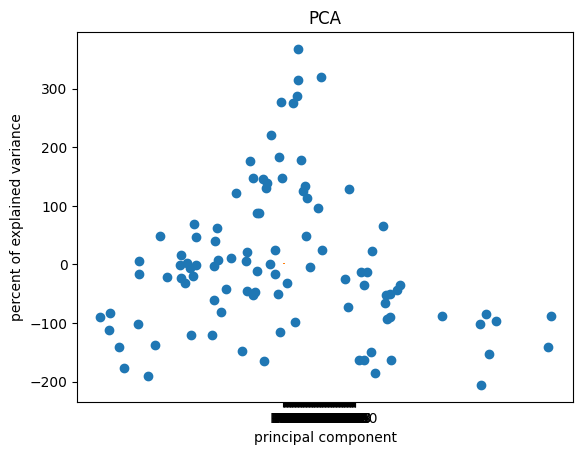

tensor([[  12.2063,  -77.8616, -149.1633,  ...,   -8.2371,   20.4644,
            1.0884],
        [ 223.2612,  137.8654,  177.1018,  ...,    7.4314,  -10.9841,
            1.3562],
        [-196.5607, -117.0096,    7.3594,  ...,   -3.8000,   -0.8453,
           -0.3326],
        ...,
        [ -31.3732,   15.8903,  -42.6000,  ...,    2.3021,  -25.6316,
            0.6649],
        [   3.8351,  114.5672,   94.1763,  ...,  -10.1473,    0.6589,
            0.6959],
        [ 140.3672,   37.5457,  -25.8610,  ...,    2.6856,  -13.3038,
           -0.6841]], dtype=torch.float64)
[0 2 0 2 0 0 2 0 0 0 1 2 0 0 2 0 2 2 2 0 0 0 2 1 0 0 2 2 0 0 0 0 2 0 0 2 0
 0 2 3 2 2 2 1 0 3 0 2 0 1 0 0 0 1 0 0 3 0 2 2 1 3 2 2 0 0 0 2 0 0 2 2 0 0
 2 3 1 2 2 0 1 0 3 2 2 0 2 0 2 0 0 0 0 0 2 0 2 0 2 2]
vdcldiclen: 4
idx:  42
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_42.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:18<00:00, 8340.44it/s] 


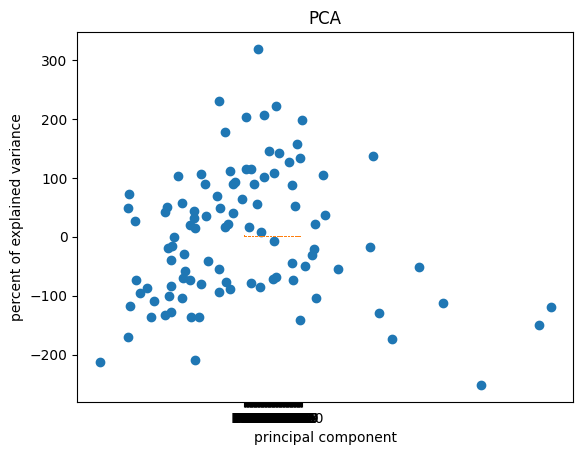

tensor([[ 3.7368e+01, -7.2484e+01, -1.6475e+02,  ..., -6.2736e+00,
          4.2416e+00,  5.1649e-01],
        [ 1.1628e+02,  9.5210e+01,  2.3444e+02,  ...,  1.2566e+01,
          5.0892e+00, -1.7700e-01],
        [-7.6142e+01,  3.0548e+01,  1.5759e+00,  ..., -1.8504e+01,
          1.7471e+00,  1.1599e+00],
        ...,
        [-5.0212e+01, -1.2551e+02,  1.0935e+02,  ...,  2.0867e+01,
         -2.4860e+01, -3.6313e-01],
        [ 6.7115e+01,  1.2275e+01, -3.5378e+01,  ...,  2.6060e+01,
         -5.9246e+00,  1.7151e+00],
        [ 2.9370e+01, -2.3365e+02,  2.8008e+02,  ...,  6.4452e+00,
          1.9960e+01, -6.5527e-01]], dtype=torch.float64)
[3 0 1 1 2 3 3 3 3 1 2 0 3 1 0 0 1 3 1 0 1 1 3 3 1 3 1 1 1 1 1 1 3 3 1 1 1
 0 1 1 1 1 0 0 2 3 1 0 0 0 1 0 1 1 1 1 1 3 1 2 1 1 0 1 2 0 3 1 1 2 2 2 1 1
 0 1 1 0 1 1 3 3 1 1 3 3 2 3 0 0 1 3 1 1 0 1 1 1 1 3]
vdcldiclen: 4
idx:  43
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_43.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9244.25it/s]


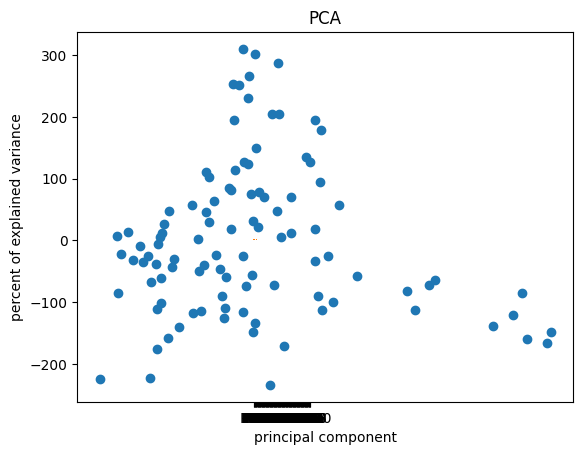

tensor([[-1.8576e+02, -2.2405e+01, -5.2751e+01,  ..., -1.4277e+00,
         -9.1273e+00, -4.6864e-01],
        [-1.3357e+02, -3.4453e+01, -8.1558e+00,  ..., -1.3554e+01,
          1.6336e+00,  2.8463e-01],
        [-2.0880e+02, -1.2667e+02, -7.7383e+01,  ...,  1.7761e+01,
         -1.4149e+01, -7.7596e-01],
        ...,
        [-2.9617e+02, -2.1972e+02,  8.6995e+01,  ..., -8.5805e+00,
         -4.2360e+00,  5.3398e-02],
        [-1.1837e+02, -1.5684e+02, -7.2832e+01,  ..., -7.8397e+00,
          2.2059e+00, -1.0445e-01],
        [ 8.0356e+01,  4.7415e+01,  2.0884e+02,  ..., -1.7877e+01,
          2.0599e+00,  1.5650e+00]], dtype=torch.float64)
[0 0 1 1 0 1 2 0 3 0 1 0 0 3 0 2 3 0 1 0 2 1 1 2 1 0 0 0 1 0 0 0 0 0 1 0 0
 3 2 1 0 1 0 3 3 0 1 0 1 0 0 0 1 1 3 0 0 1 0 1 0 0 1 1 1 2 3 0 0 0 3 0 1 1
 0 3 3 0 0 0 0 1 1 1 0 0 0 2 0 0 0 1 1 3 1 3 0 0 1 0]
vdcldiclen: 4
idx:  44
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_44.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9173.14it/s] 


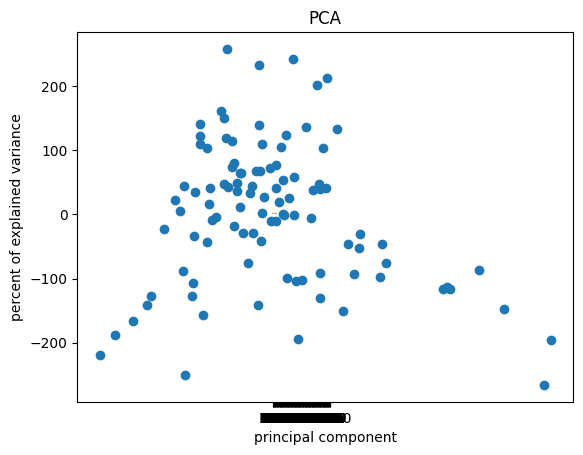

tensor([[-2.4041e+02, -1.1836e+02, -3.9672e+01,  ..., -2.3773e+01,
          1.1426e+01,  2.1015e-01],
        [-1.5971e+02, -7.1124e+01,  9.4798e+01,  ...,  1.6458e+01,
          2.0225e+01, -5.5054e-01],
        [-1.3304e+02, -4.6221e+01, -7.7137e+01,  ...,  1.5599e+01,
          9.1376e+00, -1.9713e+00],
        ...,
        [-2.7294e+02, -2.0290e+02,  8.4817e+01,  ..., -6.8770e+00,
         -2.0522e+00, -1.4707e-01],
        [-9.2063e+01, -1.4134e+02, -7.9300e+01,  ..., -5.7367e+00,
          5.0736e+00, -3.0151e-01],
        [ 1.1180e+02,  6.8441e+01,  2.1024e+02,  ..., -1.5916e+01,
          4.9071e+00,  1.5392e+00]], dtype=torch.float64)
[2 2 2 0 3 2 2 0 1 2 1 0 3 3 2 1 3 2 3 1 3 1 2 1 1 0 0 3 3 3 2 2 0 2 1 3 1
 3 0 3 2 3 0 3 3 3 3 3 3 3 0 0 2 2 2 0 3 0 2 0 3 0 0 2 0 2 2 1 2 0 2 3 0 2
 1 0 3 3 1 0 1 1 3 3 3 3 2 2 0 3 3 0 0 1 0 1 3 2 2 3]
vdcldiclen: 4
idx:  45
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_45.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9126.38it/s] 


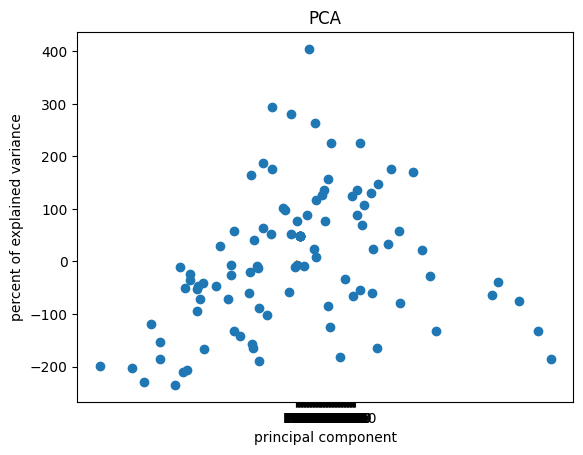

tensor([[-8.2399e+01, -3.2129e+01, -6.2981e+00,  ..., -2.1226e+01,
         -9.9184e+00, -1.2378e+00],
        [ 1.9594e+00,  3.8962e+01,  6.6955e+01,  ..., -1.0279e+01,
         -2.0870e-01,  8.2829e-01],
        [ 2.7792e+01,  1.1489e+02, -1.6022e+00,  ..., -8.0495e+00,
         -1.0385e+00,  2.1307e-01],
        ...,
        [ 8.6346e+01,  1.3243e+02,  4.4250e+00,  ...,  7.9758e+00,
         -2.4884e+00, -3.9635e-01],
        [ 8.3943e+01, -1.1408e-01,  6.2615e+01,  ..., -7.4397e+00,
          5.4133e+00,  7.4394e-01],
        [-1.4979e+02, -8.5898e+01, -4.3138e+01,  ..., -2.7014e+00,
          1.2218e+01, -1.7265e+00]], dtype=torch.float64)
[2 1 1 2 2 2 2 2 2 1 2 1 2 2 1 1 1 2 2 3 2 2 2 2 3 1 1 1 1 1 1 1 3 0 2 2 2
 1 0 1 2 2 3 1 3 2 2 2 1 2 1 0 2 2 2 1 1 3 0 0 1 2 1 1 1 2 1 1 1 1 2 3 3 1
 3 1 3 2 1 3 0 1 1 2 2 1 3 2 2 3 1 1 2 0 2 1 1 1 1 2]
vdcldiclen: 4
idx:  46
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_46.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9169.55it/s]


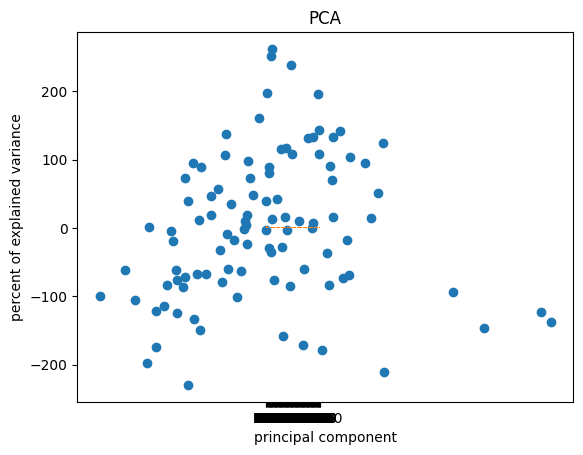

tensor([[-151.7104,  -68.1718,    5.3693,  ...,   18.9782,    0.5952,
            0.5879],
        [ -93.0139,  -45.6316,   65.4154,  ...,  -17.8617,   14.3663,
            0.7525],
        [   6.0135,  105.4514, -113.3467,  ...,  -22.5181,   22.9998,
           -0.8902],
        ...,
        [-134.8264,  -10.1310,  -32.1886,  ...,   -4.0393,   -1.2655,
            0.5770],
        [  52.2777,  129.5987,  -57.9447,  ...,  -27.4965,    5.9918,
            2.1673],
        [  43.0092,  111.0514,   -9.3855,  ...,   11.3528,   -6.0631,
           -1.1597]], dtype=torch.float64)
[1 1 2 1 1 3 2 1 3 1 2 2 3 3 1 2 0 1 1 2 1 2 1 1 1 1 1 2 3 1 1 1 2 1 3 1 2
 1 1 2 2 2 1 1 2 2 1 1 0 2 3 0 3 1 2 3 2 2 3 1 2 1 2 1 2 1 3 2 1 2 3 1 1 2
 1 1 1 2 3 0 2 1 1 2 0 1 1 2 2 2 2 2 2 2 1 1 0 2 1 1]
vdcldiclen: 4
idx:  47
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_47.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:19<00:00, 7769.03it/s] 


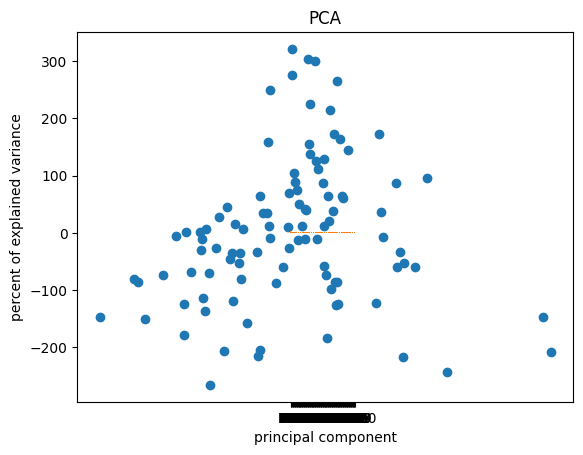

tensor([[  77.4982,  143.8767,  122.7428,  ...,  -12.6068,  -21.0653,
            0.7493],
        [ -22.9028,   88.6364,   62.4495,  ...,   -2.7634,   -5.3527,
           -1.4161],
        [ -40.8681,  -27.9581,   80.7397,  ...,   12.6024,  -18.5772,
            1.6561],
        ...,
        [ -49.1484,   29.7533,   27.3923,  ...,   -4.1553,    7.8758,
            0.5498],
        [-149.0260,   -2.1297, -208.0941,  ...,   21.2568,  -25.2436,
            2.0161],
        [-107.0337,  -40.9219, -144.3978,  ...,    0.7577,    2.8886,
            0.4555]], dtype=torch.float64)
[3 3 3 3 2 1 3 3 3 2 2 2 2 2 0 2 2 3 2 3 3 2 1 2 1 2 2 2 2 2 1 2 3 3 2 2 1
 2 2 1 2 2 1 0 2 2 2 2 2 3 0 0 3 0 2 2 2 2 3 3 3 3 3 3 0 3 2 0 3 1 2 1 1 3
 3 0 3 3 2 2 2 3 3 2 3 3 3 3 2 3 3 2 2 0 3 2 2 3 2 2]
vdcldiclen: 4
idx:  48
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_48.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9093.56it/s]


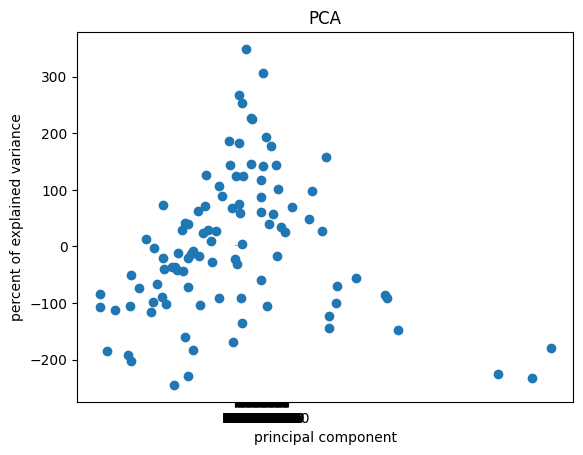

tensor([[-1.6288e+01, -1.0801e+02, -6.5613e+01,  ...,  1.9232e+00,
         -4.1132e+00,  4.2263e-01],
        [ 4.4251e+02, -1.7273e+02, -1.0228e+01,  ...,  3.1867e+01,
          6.9688e+01, -1.3358e+00],
        [-1.7082e+02, -9.1693e+01, -1.5030e+01,  ...,  4.9235e+00,
         -1.1993e+00, -2.9399e-01],
        ...,
        [ 3.2610e+01, -3.4943e+01, -1.5270e+02,  ...,  1.0531e+01,
          1.2340e+01, -1.0731e+00],
        [-9.2150e+01,  2.2426e+01, -3.6709e+01,  ..., -4.6287e+00,
          5.0150e+00,  6.6428e-01],
        [-5.8339e+01,  9.6643e+01,  1.0134e+02,  ..., -2.2555e+01,
         -1.3561e+01, -2.2574e-01]], dtype=torch.float64)
[3 2 1 0 0 1 3 2 0 3 1 1 0 3 1 2 1 1 1 1 3 1 0 1 1 2 0 1 2 3 3 0 2 0 1 3 0
 1 0 0 3 1 1 1 3 3 1 3 1 1 3 0 0 3 3 3 3 3 1 1 1 3 0 1 0 3 3 1 2 0 3 1 0 3
 3 3 3 1 3 1 3 3 3 0 1 3 3 1 1 3 0 1 3 3 1 3 3 3 1 0]
vdcldiclen: 4
idx:  49
/content/gdrive/MyDrive/video_feature_batch/video_feature_batch_49.pkl
torch.Size([100, 2955, 768])


100%|██████████| 151296/151296 [00:16<00:00, 9030.98it/s] 


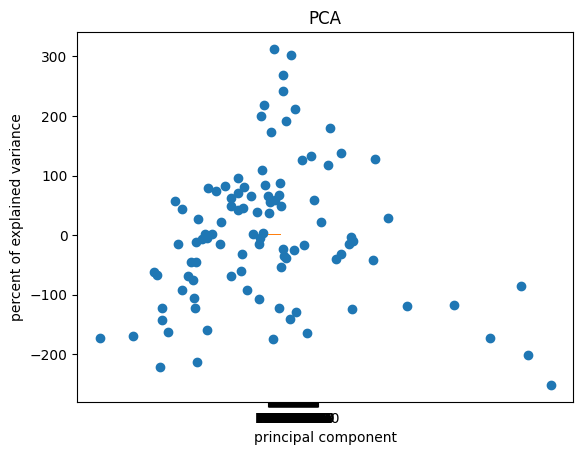

tensor([[-6.4322e+01, -4.7940e+01,  1.3428e+01,  ..., -1.5415e+01,
          1.3720e+00, -5.2350e-01],
        [ 1.5428e+02, -9.9047e+01,  3.2354e+02,  ...,  2.7368e+01,
         -3.7303e+01,  3.6982e-01],
        [ 3.8704e+01, -1.3855e+02, -1.7423e+02,  ...,  1.9736e+01,
         -1.9281e+01,  2.1413e+00],
        ...,
        [-1.8164e+02, -2.5232e+01,  1.5272e+01,  ..., -5.4056e-01,
         -8.0542e-01, -2.9167e-01],
        [ 1.8925e+01,  1.5078e+02,  5.2862e+01,  ..., -1.9675e+00,
          3.4376e+00,  1.3856e-02],
        [-1.6260e+02, -4.4851e+00, -1.4165e+02,  ...,  1.0009e+01,
         -1.6945e+01, -4.0691e-01]], dtype=torch.float64)
[0 3 0 1 1 1 1 2 1 0 1 0 0 3 1 3 0 0 2 2 2 1 3 1 0 1 3 1 0 0 0 1 3 2 3 3 1
 0 0 1 0 1 1 0 2 2 2 2 3 1 0 0 2 1 3 0 1 3 0 0 0 1 1 3 1 0 1 3 1 0 1 2 1 1
 3 1 2 2 0 2 1 0 1 2 1 2 2 3 3 1 0 1 1 0 3 1 3 1 1 0]
vdcldiclen: 4


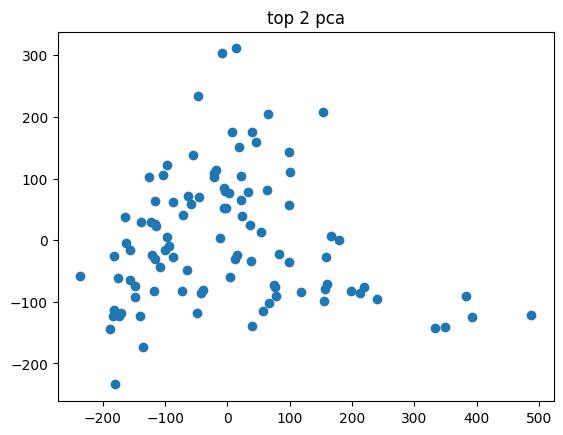

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import torch
from tqdm import trange
import os

video_cluster_dict = {
    'cluster_0':[],
    'cluster_1':[],
    'cluster_2':[],
    'cluster_3':[]
} #10000 videos' cluster dictionary
# pca_video_size=500

#with open("../../../USC/CSCI567/project/datasets/MSRVTT/videos/video_feature_batch_500.pkl", "rb") as f:
for idx in range(cur_idx+1):
  print('idx: ', idx)

  with open(save_path+"/video_feature_batch_"+str(idx)+".pkl", "rb") as f:
      print(f"{save_path}/video_feature_batch_{idx}.pkl")
      video_feature_batch = pickle.load(f)
      print(video_feature_batch.shape)

  batch_size=15
  #video_feature_batch = video_feature_batch.reshape(500, -1)
  video_feature_batch = video_feature_batch.reshape(pca_video_size, -1)
  for i in trange(int(video_feature_batch.shape[-1]/batch_size)):
      index=i*batch_size
      mean = torch.mean(video_feature_batch[:,index:batch_size+index],dim=0)
      std = torch.std(video_feature_batch[:,index:batch_size+index],dim=0)
      video_feature_batch[:,index:batch_size+index] = (video_feature_batch[:,index:batch_size+index] - mean) / std

  scaleData = video_feature_batch[:pca_video_size,:]

  if idx == 0: #only calculate the PCs for the first video set
    pca = PCA()
    pca.fit(scaleData)
  data_pca = pca.transform(scaleData) #apply the same PCs to all the video sets to calculate similarity for clustering
  # print(data_pca.shape)
  # print(data_pca)
  per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
  labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
  plt.bar(x=range(1,len(per_var)+1),height = per_var, tick_label = labels)
  plt.ylabel('percent of explained variance')
  plt.xlabel('principal component')
  plt.title('PCA')
  plt.show()

  #data_pca = pca.transform(video_feature_batch[idx*100:(idx+1)*100,:])
  pca_df = pd.DataFrame(data_pca, index = video_name_list[idx * pca_video_size:(idx+1) * pca_video_size], columns = labels)
  plt.scatter(pca_df.PC1, pca_df.PC2)
  plt.title('top 2 pca')
  # for sample in pca_df.index:
  #     plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
  # plt.show()

  numpy_arrays = []
  for pc in pca_df.iloc:
      #print(pc.values)
      numpy_arrays.append([series for series in pc])
  numpy_arrays = np.array(numpy_arrays)

  print(torch.tensor(numpy_arrays))

  num_clusters = 4

  #reshaped_features = np.reshape(video_batch, (-1,  10 * 3 * 224 * 224))#we need pca!!!!
  #print(reshaped_features.shape)
  gmm = GaussianMixture(n_components=num_clusters, random_state=42)
  cluster_labels = gmm.fit_predict(numpy_arrays)
  #cluster_labels = gmm.fit_predict(reshaped_features)
  print(cluster_labels)
  print('vdcldiclen:', len(video_cluster_dict))
  c0 = []
  c1 = []
  c2 = []
  c3 = []
  for i in range(len(cluster_labels)):
    if cluster_labels[i] == 0:
      c0.append(video_name_list[(idx * pca_video_size)+i])
    elif cluster_labels[i] == 1:
      c1.append(video_name_list[(idx * pca_video_size)+i])
    elif cluster_labels[i] == 2:
      c2.append(video_name_list[(idx * pca_video_size)+i])
    elif cluster_labels[i] == 3:
      c3.append(video_name_list[(idx * pca_video_size)+i])
    #video_cluster_dict[video_name_list[(idx*100)+i]] = cluster_labels[i]
  video_cluster_dict['cluster_0'].extend(c0)
  video_cluster_dict['cluster_1'].extend(c1)
  video_cluster_dict['cluster_2'].extend(c2)
  video_cluster_dict['cluster_3'].extend(c3)

pickle_cluster0_file_path = "/content/gdrive/MyDrive/cluster0.pkl"
pickle_cluster1_file_path = "/content/gdrive/MyDrive/cluster1.pkl"
pickle_cluster2_file_path = "/content/gdrive/MyDrive/cluster2.pkl"
pickle_cluster3_file_path = "/content/gdrive/MyDrive/cluster3.pkl"


with open(pickle_cluster0_file_path, 'wb') as pickle_file:
    pickle.dump(video_cluster_dict['cluster_0'], pickle_file)
with open(pickle_cluster1_file_path, 'wb') as pickle_file:
    pickle.dump(video_cluster_dict['cluster_1'], pickle_file)
with open(pickle_cluster2_file_path, 'wb') as pickle_file:
    pickle.dump(video_cluster_dict['cluster_2'], pickle_file)
with open(pickle_cluster3_file_path, 'wb') as pickle_file:
    pickle.dump(video_cluster_dict['cluster_3'], pickle_file)

In [ ]:
print(video_cluster_dict['cluster_0'])
print(video_cluster_dict['cluster_1'])
print(video_cluster_dict['cluster_2'])
print(video_cluster_dict['cluster_3'])

['video9328.mp4', 'video7557.mp4', 'video9250.mp4', 'video8106.mp4', 'video6912.mp4', 'video7040.mp4', 'video8691.mp4', 'video6840.mp4', 'video8423.mp4', 'video6964.mp4', 'video7811.mp4', 'video8818.mp4', 'video7354.mp4', 'video9684.mp4', 'video5320.mp4', 'video6696.mp4', 'video8237.mp4', 'video6075.mp4', 'video7836.mp4', 'video5614.mp4', 'video7405.mp4', 'video8035.mp4', 'video9892.mp4', 'video9865.mp4', 'video5586.mp4', 'video9252.mp4', 'video6843.mp4', 'video5127.mp4', 'video9999.mp4', 'video8473.mp4', 'video6693.mp4', 'video5680.mp4', 'video6984.mp4', 'video6791.mp4', 'video7551.mp4', 'video9721.mp4', 'video8080.mp4', 'video5813.mp4', 'video5181.mp4', 'video8938.mp4', 'video7261.mp4', 'video5288.mp4', 'video7335.mp4', 'video9853.mp4', 'video6936.mp4', 'video8891.mp4', 'video6946.mp4', 'video8096.mp4', 'video6367.mp4', 'video5995.mp4', 'video7632.mp4', 'video8540.mp4', 'video7258.mp4', 'video6609.mp4', 'video7411.mp4', 'video7730.mp4', 'video7827.mp4', 'video7272.mp4', 'video6102.mp

In [ ]:
pickle_cluster0_file_path = "/content/gdrive/MyDrive/cluster0.pkl"
pickle_cluster1_file_path = "/content/gdrive/MyDrive/cluster1.pkl"
pickle_cluster2_file_path = "/content/gdrive/MyDrive/cluster2.pkl"
pickle_cluster3_file_path = "/content/gdrive/MyDrive/cluster3.pkl"


with open(pickle_cluster0_file_path, 'wb') as pickle_file:
    pickle.dump(video_cluster_dict['cluster_0'], pickle_file)
with open(pickle_cluster1_file_path, 'wb') as pickle_file:
    pickle.dump(video_cluster_dict['cluster_1'], pickle_file)
with open(pickle_cluster2_file_path, 'wb') as pickle_file:
    pickle.dump(video_cluster_dict['cluster_2'], pickle_file)
with open(pickle_cluster3_file_path, 'wb') as pickle_file:
    pickle.dump(video_cluster_dict['cluster_3'], pickle_file)

In [ ]:
print(len(list(video_cluster_dict['cluster_0']))+len(list(video_cluster_dict['cluster_1']))+len(list(video_cluster_dict['cluster_2']))+len(list(video_cluster_dict['cluster_3'])))

5000


In [ ]:
print(pca_df.PC1, pca_df.PC10)

video0.mp4       -88.574577
video6747.mp4    316.112133
video1.mp4       361.025313
video10.mp4      205.640679
video100.mp4      59.705234
                    ...    
video1039.mp4   -324.162676
video6791.mp4     11.293239
video104.mp4      35.131459
video6792.mp4   -135.195577
video6793.mp4     -0.605965
Name: PC1, Length: 100, dtype: float64 video0.mp4      -144.116762
video6747.mp4    -45.778524
video1.mp4      -141.258367
video10.mp4      306.499820
video100.mp4     257.230516
                    ...    
video1039.mp4    -52.957030
video6791.mp4   -107.086764
video104.mp4     -82.133451
video6792.mp4    368.957727
video6793.mp4    -15.501991
Name: PC10, Length: 100, dtype: float64


In [ ]:
print(video_feature_batch.shape)

torch.Size([100, 2269440])


In [ ]:
#print(len(video_name_list))
cur_idx = 1
save_path = "/content/video_feature_batch"